<a href="https://colab.research.google.com/github/uanushkatkd/CS6910-Assignment-1/blob/main/Dl1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb -qU
import wandb
!wandb login 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 4.2 MB/s eta 0:00:00
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.datasets import mnist

from sklearn.model_selection import train_test_split
import math

from tqdm import tqdm



In [ ]:


# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="CS6910_Assignment_1",
)
# Loading the fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#class names for fashion-MNIST
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# creating 2x5 grid 
img={}

for i in range(10):
    # to find first image in the training set with class label i
    idx = np.where(y_train == i)[0][0]
    # Plot the image
    img[class_names[i]]=(wandb.Image(x_train[idx], caption=class_names[i]))
    
wandb.log(img)    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Currently logged in as: cs22s015. Use `wandb login --relogin` to force relogin


4422102/4422102 [==============================] - 0s 0us/step


In [2]:

# one hot encoding
#from keras.utils import to_categorical
def onehot_encoding(a,n_class):
  temp = []
  for i in a:
    t1 = np.zeros(n_class)
    t1[i] = 1
    temp.append(t1)
  temp=np.array(temp)
  return temp

# Loading the fashion-MNIST dataset

def load_data(dataset):
  if dataset=='fashion_mnist':
    (x_tr, y_tr), (x_test, y_test) = fashion_mnist.load_data()
    #class names for fashion-MNIST
    class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  elif dataset=='mnist':
    (x_tr, y_tr), (x_test, y_test) = mnist.load_data()
    #class names for MNIST
    class_names = [0,1,2,3,4,5,6,7,8,9]

    

  x_train,x_val,y_train, y_val = train_test_split(x_tr,y_tr ,random_state=104,test_size=0.10, shuffle=True)
  # creating 2x5 grid 
  fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
  ax1=ax.flat
  for i in range(10):
    # to find first image in the training set with class label i
    idx = np.where(y_train == i)[0][0]
    # Plot the image
    ax1[i].imshow(x_train[idx], cmap='gray')
    ax1[i].set_xlabel(class_names[i])
    ax1[i].set_xticklabels([])
    ax1[i].set_yticklabels([])
    # Display the plot
  plt.show()
  # Normalize data
  x_train,x_val,x_test= x_train/255.0,x_val/255.0,x_test/255.0
  #one hot encoding
  #Reshaping train and test data
  x_train,x_val,x_test=x_train.reshape(len(x_train),28*28),x_val.reshape(len(x_val),28*28),x_test.reshape(len(x_test),28*28)
  # one hot encoding
  y_train=onehot_encoding(y_train,10)  #run once only
  y_val = onehot_encoding(y_val,10)
  y_test = onehot_encoding(y_test,10)
  print(y_val)
  #y_test = to_categorical(y_test, dtype ="uint8")
  # Labels after applying the function
  # Training set labels
  #print(x_train.shape)
  print(y_val.shape)
  
  return x_train,x_test,x_val,y_train,y_test,y_val,class_names




4422102/4422102 [==============================] - 0s 0us/step


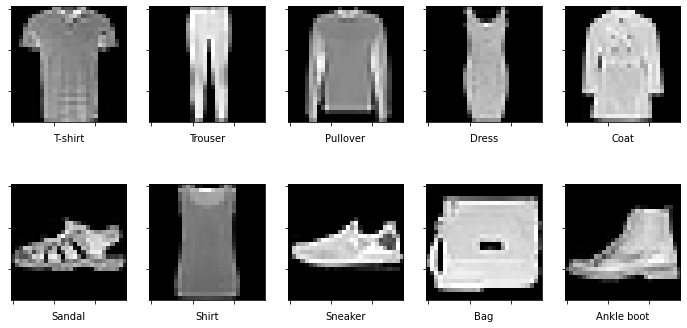

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]
(6000, 10)
(54000, 784)
(54000, 10)
(6000, 784)
(6000, 10)
(10000, 784)
(10000, 10)


In [3]:
x_train,x_test,x_val,y_train,y_test,y_val,class_names=load_data('fashion_mnist')
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)


In [ ]:
hidden_layer=[256,128,64]
no_of_class=10
layer_dim=[x_train.shape[1]]+hidden_layer+[no_of_class]
print(layer_dim)
def initialise_params(train,label,layers):

  params={}
  L=len(layers)
  w=[]
  b=[]
  for i in range(1,L):
    params['W'+str(i)]= np.random.randn(layers[i], layers[i-1]) * 0.05
    params['b' + str(i)] =  np.zeros((layers[i], 1))

  return params  

def forward_prop(train,label,layers,params):
  L=len(layers)
  a={}
  h={}
  h['h'+str(0)]=(train.T)
  
  for i in range(1,L-1):
    #preactivation calculation
    print(i)
    a['a'+str(i)]= params['W'+str(i)] @ h['h'+str(i-1)]+ params['b'+str(i)]
    
    #activation calculation
    h['h'+str(i)]=sigmoid(a['a'+str(i)])
    
  a['a'+str(L-1)]= params['W'+str(L-1)] @ (h['h'+str(L-2)]) +params['b'+str(L-1)]
  y_prob=[]
  for i in range(len(a['a'+str(L-1)][0])):
    y_prob.append(softmax(a['a'+str(L-1)][:,i]))
  y_prob=np.array(y_prob)
  h['h'+str(L-1)]=y_prob
  
  return a,h,y_prob

def sigmoid(x):
  return 1/(1+np.exp(-x))

def softmax(x):
   return (np.exp(x)/np.exp(x).sum())



p=initialise_params(x_train,y_train,layer_dim)
for key,val in p.items():
  print(key,'->',val.shape)
  
a1,h1,y_h=forward_prop(x_train[:10,:],y_train[:10,:],layer_dim,p)
print((y_h[0]))
for key,val in a1.items():
  print(key,'->',val.shape)
for key,val in h1.items():
  print(key,'->',val.shape)

#print(y_train)

[784, 256, 128, 64, 10]
W1 -> (256, 784)
b1 -> (256, 1)
W2 -> (128, 256)
b2 -> (128, 1)
W3 -> (64, 128)
b3 -> (64, 1)
W4 -> (10, 64)
b4 -> (10, 1)
1
2
3
[0.10065752 0.10165254 0.08910951 0.10880497 0.1042676  0.10800967
 0.08811031 0.1096371  0.07022441 0.11952637]
a1 -> (256, 10)
a2 -> (128, 10)
a3 -> (64, 10)
a4 -> (10, 10)
h0 -> (784, 10)
h1 -> (256, 10)
h2 -> (128, 10)
h3 -> (64, 10)
h4 -> (10, 10)


In [ ]:

#y_train=y_train[:5,:]
#x_train=x_train[:5,:]
#print(y_train)


In [6]:
np.random.seed(1)
class NN:
  def __init__(self, layers, epochs, lr,activation_func,loss_func,optimizer,initialize,weight_decay,batch_size=32):
    self.layers = layers
    self.epochs = epochs
    self.lr = lr
    self.activation_func=activation_func
    self.loss_func=loss_func
    self.optimizer=optimizer
    self.initialize=initialize
    self.weight_decay=weight_decay
    self.batch_size=batch_size
    self.params=self.initialise_params()
    self.L=len(self.layers)
    
  def initialise_params(self):
    params={}
    L=len(self.layers)
    
    for i in range(1,L):
      if self.initialize=='random':
        params['W'+str(i)]= np.random.randn(self.layers[i], self.layers[i-1]) * 0.1
      elif self.initialize=='xavier':
        params['W'+str(i)]= np.random.randn(self.layers[i], self.layers[i-1]) * np.sqrt(2/ (self.layers[i - 1] + self.layers[i]))
      elif self.initialize=='he_normal':
         params['W' + str(i)] = np.random.randn(self.layers[i], self.layers[i-1]) * np.sqrt(2/self.layers[i-1])
      elif self.initialize=='he_uniform':
         params['W' + str(i)] = np.random.uniform(low=-np.sqrt(6 / self.layers[i-1]), high=np.sqrt(6 /self.layers[i-1]), size=(self.layers[i], self.layers[i-1]))
  
      params['b' + str(i)] =  np.zeros((self.layers[i], 1))

    return params  
  
  def updates(self):
    updates={}
    L=len(self.layers)
   
    for i in range(1,self.L):
      updates['W'+str(i)]= np.zeros((self.layers[i], self.layers[i-1])) 
      updates['b' + str(i)] =  np.zeros((self.layers[i], 1))

    return updates  

  def sigmoid(self, x, derivative=False):
    if derivative:
      return (np.exp(-x))/((np.exp(-x)+1)**2)
    return 1/(1 + np.exp(-x))

  def tan_h(self, x, derivative=False):
    t=np.tanh(x)
    if derivative:
      return 1-t**2
    return t

  def relu(self, x, derivative=False):
    if derivative:
      return 1*(x>0)
    return np.maximum(0,x)


  def softmax(self, x, derivative=False):
    exps = np.exp(x - x.max())
    if derivative:
      return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
    return exps/np.sum(exps, axis=0)
  
  def regularization_loss(self):
    # Calculate the L2 regularization loss
    L=len(self.layers)
    regularization_loss = 0.0
    for i in range(1,L):
      regularization_loss += np.sum(np.square(self.params['W'+str(i)]))
    regularization_loss *= self.weight_decay
    return regularization_loss

  def forward_prop(self,train):
    params = self.params
    L=len(self.layers)
   
    a={}
    h={}
    train=train.T
    h['h'+str(0)]=train.reshape(len(train),1)
    for i in range(1,L-1):
      #preactivation calculation
      #print(i)
      a['a'+str(i)]= params['W'+str(i)] @ h['h'+str(i-1)]+ params['b'+str(i)]
        #activation calculation
      if self.activation_func=='tanh':
        h['h'+str(i)]=self.tan_h(a['a'+str(i)])
      elif self.activation_func=='sigmoid':
        h['h'+str(i)]=self.sigmoid(a['a'+str(i)])
      if self.activation_func=='relu':
        h['h'+str(i)]=self.relu(a['a'+str(i)])
       
    a['a'+str(L-1)]= params['W'+str(L-1)] @ (h['h'+str(L-2)]) +params['b'+str(L-1)]
    y_prob=[]
    for i in range(len(a['a'+str(L-1)][0])):
      y_prob.append(self.softmax(a['a'+str(L-1)][:,i]))
    y_prob=np.array(y_prob)
    h['h'+str(L-1)]=y_prob
  
    return a,h,y_prob
  
  def backward_prop(self, y_train, y_hat,a,h):
    params = self.params
    delta_params = {}
    L=len(self.layers)
   
    y_train=y_train.reshape(len(y_train),1)
    # Compute output gradient
        # Gardient with respect to last layer
    if self.loss_func == 'cross_entropy':
      delta_params['a' + str(L-1)] = (y_hat - y_train)
    elif self.loss_func == 'squared_error':
      delta_params['a' + str(L-1)] = (y_hat - y_train)*y_hat*(1-y_hat)
    
    
    for i in range(L-1,0,-1):
      #gradients w rt parameters 
      delta_params['W' + str(i)]=(delta_params['a' + str(i)]@(h['h'+str(i-1)].T))
      delta_params['b' + str(i)]=np.sum(delta_params['a' + str(i)],axis=1,keepdims=True)

      #gradients w rt layer below

      delta_params['h' + str(i-1)]=(params['W' + str(i)].T)@ delta_params['a' + str(i)]

      #gradients w rt layer below(preactivation)

      if i > 1:
        if self.activation_func=='tanh':
          delta_params['a' + str(i-1)] = delta_params['h' + str(i-1)] * self.tan_h(a['a' + str(i-1)], derivative=True)  
        elif self.activation_func=='sigmoid':
          delta_params['a' + str(i-1)] = delta_params['h' + str(i-1)] * self.sigmoid(a['a' + str(i-1)], derivative=True)  
        elif self.activation_func=='relu':
          delta_params['a' + str(i-1)] = delta_params['h' + str(i-1)] * self.relu(a['a' + str(i-1)], derivative=True)  

    return delta_params
  
  
  def loss_fun(self,y,y_hat):
    if self.loss_func == 'cross_entropy':
      i=np.argmax(y)
      p=y_hat[i]
      loss=-np.log(p)+self.regularization_loss()
      return loss
    elif self.loss_func == 'squared_error':
      return np.sum((y-y_hat)**2)+self.regularization_loss()
 
 
  def modelPerformance(self, x_test, y_test):
    predictions = []
    y_true = []
    y_pred = []
    losses = []
    for x,y in tqdm(zip(x_test ,y_test), total=len(x_test)):
      a,h,y_p = self.forward_prop(x)
      predictedClass = np.argmax(y_p)
      y.reshape(len(y),1)
      actualClass = np.argmax(y)
      y_true.append(actualClass)
      y_pred.append(predictedClass)
      predictions.append(predictedClass == actualClass)
      losses.append(self.loss_fun(y.T,y_p.T))
    accuracy = (np.sum(predictions)*100)/len(predictions)
    loss = np.sum(losses)/len(losses)
    
    return accuracy, loss, y_true, y_pred

     
  def sgd(self,x_train,y_train,x_test,y_test,x_val,y_val):
    weights=self.params
    e=self.epochs
    for i in range(e):
      t=0
      dw_db=self.updates()
      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        a,h,y_p=self.forward_prop(x)
        
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
        
        for i in dw_db:
           dw_db[i]+=delta_theta[i]

        t=t+1
        if (t%self.batch_size==0):
          for key in weights:
            weights[key]=weights[key] - (self.lr)*dw_db[key]
          L=len(self.layers)
          for i in range(1,L):
            weights['W'+str(i)]=weights['W'+str(i)] - (self.weight_decay)*weights['W'+str(i)]
          
          dw_db=self.updates()

      
      val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
      print("Val Accuracy = " + str(val_acc))
      print("Val Loss = " + str(val_loss))

      train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
      print("Train Accuracy = " + str(train_acc))
      print("Train Loss = " + str(train_loss))

      
      test_acc,test_loss,y_true2,y_perd2=self.modelPerformance(x_test,y_test)


      #wandb.log({"val_acc": val_acc, "train_acc": train_acc, "test_acc": test_acc, "val_loss": val_loss, "train_loss": train_loss,"test_loss":test_loss,"epoch": e+1})
	
    self.params=weights
    return weights

  def momentum(self,x_train,y_train,x_test,y_test,x_val,y_val):
    beta=0.9
    
    weights=self.params
    
    update= self.updates()
    e=self.epochs
    for i in range(e):
      t=0
      dw_db=self.updates()
      lookahead=self.updates()
      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        a,h,y_p=self.forward_prop(x)
        
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
        
        for i in dw_db:
           dw_db[i]+=delta_theta[i]

        t=t+1
        if (t%self.batch_size==0):
          for key in lookahead:
            lookahead[key]=beta*update[key]+self.lr*dw_db[key]
          
          for key in weights:
           weights[key]=weights[key] - lookahead[key]

          L=len(self.layers)
          for i in range(1,L):
            weights['W'+str(i)]=weights['W'+str(i)] - (self.weight_decay)*weights['W'+str(i)]
          
          for key in update:
             update[key] =lookahead[key]
          
          dw_db=self.updates()
  

      
      val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
      print("Val Accuracy = " + str(val_acc))
      print("Val Loss = " + str(val_loss))

      train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
      print("Train Accuracy = " + str(train_acc))
      print("Train Loss = " + str(train_loss))

      
      test_acc,test_loss,y_true2,y_perd2=self.modelPerformance(x_test,y_test)


      #wandb.log({"val_acc": val_acc, "train_acc": train_acc, "test_acc": test_acc, "val_loss": val_loss, "train_loss": train_loss,"test_loss":test_loss,"epoch": e+1})
	
    self.params=weights
    return weights

    
   
     
  def nestrov(self,x_train,y_train,x_test,y_test,x_val,y_val):

    
    beta=0.9
    
    weights=self.params
    update= self.updates()
    
    e=self.epochs
    for i in range(e):
      dw_db= self.updates()

      lookahead= self.updates()

      #do partial updates
      for key in lookahead:
        lookahead[key]=beta*update[key]
    
      t=0
   
      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        
   
        a,h,y_p=self.forward_prop(x)
        
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
      
        for i in dw_db:
           dw_db[i]+=delta_theta[i]

        t=t+1
        if (t%self.batch_size==0):
          for key in lookahead:
            lookahead[key]=beta*update[key]+self.lr*dw_db[key]
          
          for key in weights:
           weights[key]=weights[key] - lookahead[key]

          L=len(self.layers)
          for i in range(1,L):
            weights['W'+str(i)]=weights['W'+str(i)] - (self.weight_decay)*weights['W'+str(i)]
          
          for key in update:
             update[key] =lookahead[key]
          dw_db=self.updates()

       
      val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
      print("Val Accuracy = " + str(val_acc))
      print("Val Loss = " + str(val_loss))

      train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
      print("Train Accuracy = " + str(train_acc))
      print("Train Loss = " + str(train_loss))

      
      test_acc,test_loss,y_true2,y_perd2=self.modelPerformance(x_test,y_test)


      #wandb.log({"val_acc": val_acc, "train_acc": train_acc, "test_acc": test_acc, "val_loss": val_loss, "train_loss": train_loss,"test_loss":test_loss,"epoch": e+1})
	
    self.params=weights
    return weights
       

  def rmsprop(self,x_train,y_train,x_test,y_test,x_val,y_val):

    
    beta=0.9
    eps=1e-8
    
    weights=self.params
    update= self.updates()
    
    e=self.epochs
    for i in range(e):
      t=0
    
      dw_db= self.updates()

      
      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        
   
        a,h,y_p=self.forward_prop(x)
        
        #print("y_hat",y[0])
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
       
        for i in dw_db:
           dw_db[i]+=delta_theta[i]

        t=t+1
        if (t%self.batch_size==0):
          for key in update:
            update[key]=beta*update[key]+(1-beta)*(dw_db[key]**2)
          
          for key in weights:
           weights[key]=weights[key] - (self.lr/np.sqrt(update[key]+eps))*dw_db[key]
          
          L=len(self.layers)
          for i in range(1,L):
            weights['W'+str(i)]=weights['W'+str(i)] - (self.weight_decay)*weights['W'+str(i)]
          
          dw_db=self.updates()

       
      val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
      print("Val Accuracy = " + str(val_acc))
      print("Val Loss = " + str(val_loss))

      train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
      print("Train Accuracy = " + str(train_acc))
      print("Train Loss = " + str(train_loss))

      
      test_acc,test_loss,y_true2,y_perd2=self.modelPerformance(x_test,y_test)


      #wandb.log({"val_acc": val_acc, "train_acc": train_acc, "test_acc": test_acc, "val_loss": val_loss, "train_loss": train_loss,"test_loss":test_loss,"epoch": e+1})
	
    self.params=weights
    return weights
    
  def adam(self,x_train,y_train,x_test,y_test,x_val,y_val):

    beta1=0.9
    beta2=0.999
    eps=1e-8
    
    weights=self.params
    mw_mb= self.updates()
    vw_vb=self.updates()
    
    mw_mb_hat= self.updates()
    vw_vb_hat=self.updates()
    
    e=self.epochs
    for i in range(e):
      t=0

      dw_db= self.updates()

      
      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        
   
        a,h,y_p=self.forward_prop(x)
        
        #print("y_hat",y[0])
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
       
        for j in dw_db:
           dw_db[j]+=delta_theta[j]

        t=t+1
        if (t%self.batch_size==0):
          for key in mw_mb:
            mw_mb[key]=beta1*mw_mb[key]+(1-beta1)*(dw_db[key])

          for key in vw_vb:
            vw_vb[key]=beta2*vw_vb[key]+(1-beta2)*(dw_db[key]**2)

          for key in weights:
            mw_mb_hat[key]=mw_mb[key]/(1-(beta1**(i+1)))
            vw_vb_hat[key]=vw_vb[key]/(1-(beta2**(i+1)))
            

          for key in weights:
           weights[key]=weights[key] - (self.lr/np.sqrt(vw_vb_hat[key]+eps))*mw_mb_hat[key]

          L=len(self.layers)
          for i in range(1,L):
            weights['W'+str(i)]=weights['W'+str(i)] - (self.weight_decay)*weights['W'+str(i)]
          
          dw_db=self.updates()

       
      val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
      print("Val Accuracy = " + str(val_acc))
      print("Val Loss = " + str(val_loss))

      train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
      print("Train Accuracy = " + str(train_acc))
      print("Train Loss = " + str(train_loss))

      
      test_acc,test_loss,y_true2,y_perd2=self.modelPerformance(x_test,y_test)


      #wandb.log({"val_acc": val_acc, "train_acc": train_acc, "test_acc": test_acc, "val_loss": val_loss, "train_loss": train_loss,"test_loss":test_loss,"epoch": e+1})
	
    self.params=weights
    return weights
         
 

     
    
  def nadam(self,x_train,y_train,x_test,y_test,x_val,y_val): #update nadam

    beta1=0.9
    beta2=0.999
    eps=1e-8
    
    weights=self.params
    update= self.updates()
  
    mw_mb= self.updates()
    vw_vb=self.updates()
    mw_mb_hat= self.updates()
    vw_vb_hat=self.updates()
    
    beta=0.95
    e=self.epochs
    for i in range(e):
      dw_db= self.updates()
      lookahead=self.updates()

      t=0

      #do partial updates
      for key in lookahead:
        lookahead[key]=beta*update[key]

     #one point to add here same in nestrov .check all the algos once   


      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        
   
        a,h,y_p=self.forward_prop(x)
        
        #print("y_hat",y[0])
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
       
        for j in dw_db:
           dw_db[j]+=delta_theta[j]

        t=t+1
        if (t%self.batch_size==0):
          
          for key in lookahead:
            lookahead[key]=beta*update[key]+self.lr*dw_db[key]

          for key in mw_mb:
            mw_mb[key]=beta1*mw_mb[key]+(1-beta1)*(dw_db[key])

          for key in vw_vb:
            vw_vb[key]=beta2*vw_vb[key]+(1-beta2)*(dw_db[key]**2)

          for key in weights:
            mw_mb_hat[key]=mw_mb[key]/(1-(beta1**(i+1)))
            vw_vb_hat[key]=vw_vb[key]/(1-(beta2**(i+1)))
            

          for key in weights:
           weights[key]=weights[key] - (self.lr/np.sqrt(vw_vb_hat[key]+eps))*mw_mb_hat[key]
          
          L=len(self.layers)
          for i in range(1,L):
            weights['W'+str(i)]=weights['W'+str(i)] - (self.weight_decay)*weights['W'+str(i)]
          
          for key in update:
             update[key] =lookahead[key]

          dw_db=self.updates()       
      
      val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
      print("Val Accuracy = " + str(val_acc))
      print("Val Loss = " + str(val_loss))

      train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
      print("Train Accuracy = " + str(train_acc))
      print("Train Loss = " + str(train_loss))

      
      #test_acc,test_loss,y_true2,y_perd2=self.modelPerformance(x_test,y_test)


      #wandb.log({"val_acc": val_acc, "train_acc": train_acc, "test_acc": test_acc, "val_loss": val_loss, "train_loss": train_loss,"test_loss":test_loss,"epoch": e+1})
	
    self.params=weights
    return weights
 

  def fit(self,x_train,y_train,x_test,y_test,x_val,y_val):
    if self.optimizer == 'sgd':
      w=self.sgd(x_train,y_train,x_test,y_test,x_val,y_val)
    elif self.optimizer == 'mgd':
      w=self.momentum(x_train,y_train,x_test,y_test,x_val,y_val)
    elif self.optimizer == 'nestrov':
      w=self.nestrov(x_train,y_train,x_test,y_test,x_val,y_val)
    elif self.optimizer == 'rmsprop':
      w=self.rmsprop(x_train,y_train,x_test,y_test,x_val,y_val)
    elif self.optimizer == 'adam':
      w=self.adam(x_train,y_train,x_test,y_test,x_val,y_val)
    elif self.optimizer == 'nadam':
      w=self.nadam(x_train,y_train,x_test,y_test,x_val,y_val)

      




hidden_layer=[256,256,256,256,256]
no_of_class=10
layer_dim=[x_train.shape[1]]+hidden_layer+[no_of_class]
print(layer_dim)
lr=0.001
#nn = NN(layer_dim,10,0.001,activation_func='tanh',loss_func='cross_entropy',optimizer='nadam',initialize='xavier',weight_decay=0.005,batch_size=32)

#nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)

[784, 256, 256, 256, 256, 256, 10]


In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
nn = NN(layer_dim,10,0.001,'relu','cross_entropy','nadam','he_uniform',0,64)

nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)




epoch 1


100%|██████████| 6000/6000 [00:10<00:00, 588.90it/s]


Val Accuracy = 85.16666666666667
Val Loss = 0.4056896265317349


100%|██████████| 54000/54000 [01:24<00:00, 636.14it/s]


Train Accuracy = 86.72222222222223
Train Loss = 0.3676179241175666
epoch 2


100%|██████████| 6000/6000 [00:09<00:00, 605.77it/s]


Val Accuracy = 85.65
Val Loss = 0.3892896001655698


100%|██████████| 54000/54000 [01:20<00:00, 674.21it/s]


Train Accuracy = 87.44259259259259
Train Loss = 0.33730354327429984
epoch 3


100%|██████████| 6000/6000 [00:09<00:00, 628.83it/s]


Val Accuracy = 86.68333333333334
Val Loss = 0.3627780072481962


100%|██████████| 54000/54000 [01:21<00:00, 660.37it/s]


Train Accuracy = 88.82777777777778
Train Loss = 0.29956334173589955
epoch 4


100%|██████████| 6000/6000 [00:09<00:00, 625.55it/s]


Val Accuracy = 87.2
Val Loss = 0.34964500676958626


100%|██████████| 54000/54000 [01:20<00:00, 668.50it/s]


Train Accuracy = 89.75925925925925
Train Loss = 0.27509805731628356
epoch 5


100%|██████████| 6000/6000 [00:09<00:00, 610.80it/s]


Val Accuracy = 87.28333333333333
Val Loss = 0.34442771862866295


100%|██████████| 54000/54000 [01:23<00:00, 647.21it/s]


Train Accuracy = 90.2611111111111
Train Loss = 0.2581045294886561
epoch 6


100%|██████████| 6000/6000 [00:09<00:00, 604.12it/s]


Val Accuracy = 87.55
Val Loss = 0.3401588857011125


100%|██████████| 54000/54000 [01:24<00:00, 636.28it/s]


Train Accuracy = 90.85555555555555
Train Loss = 0.24232728667331085
epoch 7


100%|██████████| 6000/6000 [00:08<00:00, 741.82it/s]


Val Accuracy = 87.25
Val Loss = 0.35868390176147114


100%|██████████| 54000/54000 [01:18<00:00, 690.95it/s]


Train Accuracy = 90.83518518518518
Train Loss = 0.24314064357724285
epoch 8


100%|██████████| 6000/6000 [00:09<00:00, 610.21it/s]


Val Accuracy = 87.91666666666667
Val Loss = 0.34126806170874724


100%|██████████| 54000/54000 [01:18<00:00, 683.96it/s]


Train Accuracy = 91.61666666666666
Train Loss = 0.22292234341865116
epoch 9


100%|██████████| 6000/6000 [00:07<00:00, 759.86it/s]


Val Accuracy = 88.1
Val Loss = 0.3477093069483535


100%|██████████| 54000/54000 [01:18<00:00, 689.15it/s]


Train Accuracy = 92.05
Train Loss = 0.21160218751753407
epoch 10


100%|██████████| 6000/6000 [00:09<00:00, 650.61it/s]


Val Accuracy = 87.88333333333334
Val Loss = 0.3462174521225702


100%|██████████| 54000/54000 [01:18<00:00, 685.38it/s]


Train Accuracy = 92.29629629629629
Train Loss = 0.20400689934902416


100%|██████████| 10000/10000 [00:14<00:00, 678.91it/s]


Train Accuracy = 87.85
Train Loss = 0.35932379958266636


ValueError: ignored

100%|██████████| 10000/10000 [00:19<00:00, 510.75it/s]


Train Accuracy = 87.85
Train Loss = 0.35932379958266636


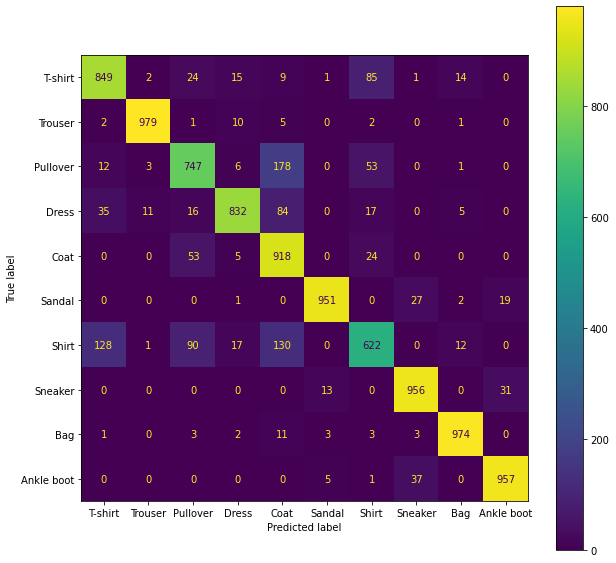

In [16]:
test_acc,test_loss,y_true,y_pred=nn.modelPerformance(x_test,y_test)

print("Train Accuracy = " + str(test_acc))
print("Train Loss = " + str(test_loss))
class_names1 = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=class_names1)


fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()


In [ ]:
sweep_config={
    'method' : 'bayes' ,
    'metric' : { 'name' : 'val_acc' , 'goal' : 'maximize' } ,
    'parameters' : {
        'epochs' : { 'values' : [5,10,20] },
        'n_hidden_layers' : {'values' : [3,4,5]},
        'n_hidden_layer_size' : { 'values' : [16,32,64,128,256]},
        'batch_size' : { 'values' : [16,32,64,128]},
        'learning_rate' : { 'values' : [0.001, 0.0001,0.0002,0.0003]},
        'optimizer' : { 'values' : ["sgd", "mgd", "nestrov", "rmsprop", "adam", "nadam"] },
        'activations' : { 'values' : ["sigmoid", "tanh", "relu"] },
        'loss_function' : {'values' : ['cross_entropy']},
        'weight_ini' : {'values' : ['random','xavier','he_normal','he_uniform']},
        'weight_decay' : { 'values' : [0,0.0005]}
    }
}

def tr():
  config_default={
      'weight_ini':'bayes',
      'n_hidden_layers':3,
      'n_hidden_layer_size':32,
      'optimizer':'sgd',
      'learning_rate':0.01,
      'epoch':10,
      'batch_size':32
  }
  wandb.init(config=config_default)

  c= wandb.config
  name = "op_"+str(c.optimizer)+"_ac_"+str(c.activations)+"_hl_"+str(c.n_hidden_layers)+"_hls_"+str(c.n_hidden_layer_size)+"_ep_"+str(c.epochs)+"_n_"+str(c.learning_rate)+"_bs_"+str(c.batch_size)+"_wi_"+str(c.weight_ini)
  wandb.init(name=name)
  n_points , n_input = np.shape(x_train)

  hn = [n_input]+[c.n_hidden_layer_size]*c.n_hidden_layers +[no_of_class] 
  hl = c.n_hidden_layers
  act = c.activations
  loss=c.loss_function
  opt = c.optimizer
  ep = c.epochs
  bs = c.batch_size
  lr = c.learning_rate
  wi = c.weight_ini
  wd=c.weight_decay

 
  nn = NN(hn,ep,lr,act,loss,opt,wi,wd,bs)

  nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)

  return
sweep_id = wandb.sweep(sweep_config, project="CS6910_Assignment_1")
wandb.agent(sweep_id, function=tr,count=20)

Create sweep with ID: mp5u8nv9
Sweep URL: https://wandb.ai/cs22s015/CS6910_Assignment_1/sweeps/mp5u8nv9


wandb: Agent Starting Run: etk0peev with config:
wandb: 	activations: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	learning_rate: 0.0002
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 64
wandb: 	n_hidden_layers: 3
wandb: 	optimizer: mgd
wandb: 	weight_decay: 0
wandb: 	weight_ini: he_uniform


epoch 1


100%|██████████| 6000/6000 [00:02<00:00, 2814.92it/s]


Val Accuracy = 62.9
Val Loss = 0.996951330588064


100%|██████████| 54000/54000 [00:24<00:00, 2222.46it/s]


Train Accuracy = 62.93518518518518
Train Loss = 0.9890690054684833


100%|██████████| 10000/10000 [00:03<00:00, 2837.14it/s]


epoch 2


100%|██████████| 6000/6000 [00:02<00:00, 2839.80it/s]


Val Accuracy = 74.8
Val Loss = 0.7142328684490545


100%|██████████| 54000/54000 [00:24<00:00, 2233.00it/s]


Train Accuracy = 75.19259259259259
Train Loss = 0.704057445990674


100%|██████████| 10000/10000 [00:03<00:00, 2760.04it/s]


epoch 3


100%|██████████| 6000/6000 [00:02<00:00, 2857.10it/s]


Val Accuracy = 79.01666666666667
Val Loss = 0.577514052182443


100%|██████████| 54000/54000 [00:22<00:00, 2427.43it/s]


Train Accuracy = 79.2611111111111
Train Loss = 0.5655794105373387


100%|██████████| 10000/10000 [00:05<00:00, 1797.30it/s]


epoch 4


100%|██████████| 6000/6000 [00:02<00:00, 2980.68it/s]


Val Accuracy = 81.71666666666667
Val Loss = 0.5136638443286408


100%|██████████| 54000/54000 [00:21<00:00, 2488.80it/s]


Train Accuracy = 82.56296296296296
Train Loss = 0.4969101975104531


100%|██████████| 10000/10000 [00:05<00:00, 1707.77it/s]


epoch 5


100%|██████████| 6000/6000 [00:02<00:00, 2094.03it/s]


Val Accuracy = 83.01666666666667
Val Loss = 0.4788730137725509


100%|██████████| 54000/54000 [00:22<00:00, 2396.07it/s]


Train Accuracy = 83.93333333333334
Train Loss = 0.458204467854865


100%|██████████| 10000/10000 [00:06<00:00, 1638.97it/s]


epoch,▁▁▁▁▁
test_acc,▁▅▇██
test_loss,█▄▂▁▁
train_acc,▁▅▆██
train_loss,█▄▂▂▁
val_acc,▁▅▇██
val_loss,█▄▂▁▁
epoch,6
test_acc,82.41
test_loss,0.49381
train_acc,83.93333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: fxnuogu1 with config:
wandb: 	activations: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0002
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 32
wandb: 	n_hidden_layers: 4
wandb: 	optimizer: mgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_ini: he_normal


epoch 1


100%|██████████| 6000/6000 [00:01<00:00, 3091.69it/s]


Val Accuracy = 9.35
Val Loss = 2.3125969887431443


100%|██████████| 54000/54000 [00:24<00:00, 2170.32it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.310371620230593


100%|██████████| 10000/10000 [00:03<00:00, 3162.71it/s]


epoch 2


100%|██████████| 6000/6000 [00:01<00:00, 3223.87it/s]


Val Accuracy = 9.35
Val Loss = 2.308066961128923


100%|██████████| 54000/54000 [00:22<00:00, 2368.29it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.305858824495974


100%|██████████| 10000/10000 [00:03<00:00, 3071.37it/s]


epoch 3


100%|██████████| 6000/6000 [00:01<00:00, 3173.94it/s]


Val Accuracy = 9.35
Val Loss = 2.3078513825766223


100%|██████████| 54000/54000 [00:19<00:00, 2764.96it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.3056567124305656


100%|██████████| 10000/10000 [00:05<00:00, 1764.55it/s]


epoch 4


100%|██████████| 6000/6000 [00:02<00:00, 2868.11it/s]


Val Accuracy = 9.35
Val Loss = 2.307780116010378


100%|██████████| 54000/54000 [00:19<00:00, 2712.36it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.3055999339928386


100%|██████████| 10000/10000 [00:03<00:00, 2699.49it/s]


epoch 5


100%|██████████| 6000/6000 [00:02<00:00, 2160.27it/s]


Val Accuracy = 9.35
Val Loss = 2.30771421199761


100%|██████████| 54000/54000 [00:19<00:00, 2759.82it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.3055488399637336


100%|██████████| 10000/10000 [00:03<00:00, 3189.26it/s]


epoch 6


100%|██████████| 6000/6000 [00:02<00:00, 2701.71it/s]


Val Accuracy = 9.35
Val Loss = 2.307649458727231


100%|██████████| 54000/54000 [00:21<00:00, 2506.81it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.3054990333237866


100%|██████████| 10000/10000 [00:03<00:00, 3246.92it/s]


epoch 7


100%|██████████| 6000/6000 [00:01<00:00, 3323.53it/s]


Val Accuracy = 9.35
Val Loss = 2.307585799602456


100%|██████████| 54000/54000 [00:21<00:00, 2528.83it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.3054504012536836


100%|██████████| 10000/10000 [00:03<00:00, 2869.61it/s]


epoch 8


100%|██████████| 6000/6000 [00:02<00:00, 2891.75it/s]


Val Accuracy = 9.35
Val Loss = 2.3075232506841803


100%|██████████| 54000/54000 [00:19<00:00, 2712.59it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.305402928727884


100%|██████████| 10000/10000 [00:05<00:00, 1737.12it/s]


epoch 9


100%|██████████| 6000/6000 [00:02<00:00, 2640.90it/s]


Val Accuracy = 9.35
Val Loss = 2.3074618189057627


100%|██████████| 54000/54000 [00:20<00:00, 2695.93it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.3053565984923607


100%|██████████| 10000/10000 [00:03<00:00, 2754.05it/s]


epoch 10


100%|██████████| 6000/6000 [00:04<00:00, 1280.86it/s]


Val Accuracy = 9.35
Val Loss = 2.307401507616375


100%|██████████| 54000/54000 [00:19<00:00, 2718.45it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.305311393352275


100%|██████████| 10000/10000 [00:03<00:00, 3206.94it/s]


epoch,▁▁▁▁▁▁▁▁▁▁
test_acc,▁▁▁▁▁▁▁▁▁▁
test_loss,█▂▁▁▁▁▁▁▁▁
train_acc,▁▁▁▁▁▁▁▁▁▁
train_loss,█▂▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▂▂▁▁▁▁▁▁
epoch,11
test_acc,10.0
test_loss,2.30552
train_acc,10.07222


wandb: Agent Starting Run: qab9w7br with config:
wandb: 	activations: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 128
wandb: 	n_hidden_layers: 4
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_ini: random


epoch 1


100%|██████████| 6000/6000 [00:05<00:00, 1098.37it/s]


Val Accuracy = 83.16666666666667
Val Loss = 0.8392157164624129


100%|██████████| 54000/54000 [00:38<00:00, 1408.34it/s]


Train Accuracy = 83.50185185185185
Train Loss = 0.8172157217172027


100%|██████████| 10000/10000 [00:07<00:00, 1274.95it/s]


epoch 2


100%|██████████| 6000/6000 [00:04<00:00, 1452.75it/s]


Val Accuracy = 83.61666666666666
Val Loss = 0.6512691888757771


100%|██████████| 54000/54000 [00:39<00:00, 1370.10it/s]


Train Accuracy = 84.12407407407407
Train Loss = 0.6269106984821673


100%|██████████| 10000/10000 [00:07<00:00, 1363.53it/s]


epoch 3


100%|██████████| 6000/6000 [00:05<00:00, 1185.58it/s]


Val Accuracy = 83.71666666666667
Val Loss = 0.5729072866709208


100%|██████████| 54000/54000 [00:37<00:00, 1439.94it/s]


Train Accuracy = 84.26851851851852
Train Loss = 0.5478183363712709


100%|██████████| 10000/10000 [00:08<00:00, 1215.44it/s]


epoch 4


100%|██████████| 6000/6000 [00:03<00:00, 1766.23it/s]


Val Accuracy = 83.68333333333334
Val Loss = 0.5385423890095467


100%|██████████| 54000/54000 [00:38<00:00, 1408.63it/s]


Train Accuracy = 84.3425925925926
Train Loss = 0.513072074196021


100%|██████████| 10000/10000 [00:07<00:00, 1332.83it/s]


epoch 5


100%|██████████| 6000/6000 [00:03<00:00, 1704.80it/s]


Val Accuracy = 83.73333333333333
Val Loss = 0.5224362592266917


100%|██████████| 54000/54000 [00:40<00:00, 1328.58it/s]


Train Accuracy = 84.42962962962963
Train Loss = 0.496673070133879


100%|██████████| 10000/10000 [00:06<00:00, 1663.84it/s]


epoch,▁▁▁▁▁
test_acc,▁▆▆██
test_loss,█▄▂▁▁
train_acc,▁▆▇▇█
train_loss,█▄▂▁▁
val_acc,▁▇█▇█
val_loss,█▄▂▁▁
epoch,6
test_acc,83.05
test_loss,0.53507
train_acc,84.42963


wandb: Agent Starting Run: ogiy9j6y with config:
wandb: 	activations: tanh
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0003
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 128
wandb: 	n_hidden_layers: 4
wandb: 	optimizer: nestrov
wandb: 	weight_decay: 0.0005
wandb: 	weight_ini: he_uniform


epoch 1


100%|██████████| 6000/6000 [00:06<00:00, 923.89it/s] 


Val Accuracy = 84.11666666666666
Val Loss = 0.8136463254738513


100%|██████████| 54000/54000 [00:37<00:00, 1432.56it/s]


Train Accuracy = 85.11481481481482
Train Loss = 0.7791305127189859


100%|██████████| 10000/10000 [00:08<00:00, 1209.61it/s]


epoch 2


100%|██████████| 6000/6000 [00:05<00:00, 1015.66it/s]


Val Accuracy = 85.11666666666666
Val Loss = 0.6849208015201559


100%|██████████| 54000/54000 [00:36<00:00, 1472.82it/s]


Train Accuracy = 86.46851851851852
Train Loss = 0.6452836933327881


100%|██████████| 10000/10000 [00:08<00:00, 1224.67it/s]


epoch 3


100%|██████████| 6000/6000 [00:05<00:00, 1072.76it/s]


Val Accuracy = 85.08333333333333
Val Loss = 0.6197905347837854


100%|██████████| 54000/54000 [00:40<00:00, 1347.94it/s]


Train Accuracy = 86.55555555555556
Train Loss = 0.5758476502421379


100%|██████████| 10000/10000 [00:07<00:00, 1268.58it/s]


epoch 4


100%|██████████| 6000/6000 [00:05<00:00, 1000.40it/s]


Val Accuracy = 84.8
Val Loss = 0.5788737634033768


100%|██████████| 54000/54000 [00:37<00:00, 1422.70it/s]


Train Accuracy = 86.63148148148149
Train Loss = 0.5312782290584724


100%|██████████| 10000/10000 [00:08<00:00, 1165.19it/s]


epoch 5


100%|██████████| 6000/6000 [00:04<00:00, 1362.37it/s]


Val Accuracy = 84.71666666666667
Val Loss = 0.5509052734759


100%|██████████| 54000/54000 [00:39<00:00, 1374.86it/s]


Train Accuracy = 86.68148148148148
Train Loss = 0.500584994326229


100%|██████████| 10000/10000 [00:08<00:00, 1177.17it/s]


epoch 6


100%|██████████| 6000/6000 [00:05<00:00, 1029.93it/s]


Val Accuracy = 84.78333333333333
Val Loss = 0.5337116307767326


100%|██████████| 54000/54000 [00:43<00:00, 1228.06it/s]


Train Accuracy = 86.74074074074075
Train Loss = 0.4810303489373883


100%|██████████| 10000/10000 [00:06<00:00, 1544.11it/s]


epoch 7


100%|██████████| 6000/6000 [00:03<00:00, 1636.04it/s]


Val Accuracy = 84.55
Val Loss = 0.5266774530010915


100%|██████████| 54000/54000 [00:40<00:00, 1317.97it/s]


Train Accuracy = 86.61481481481482
Train Loss = 0.4715997120017705


100%|██████████| 10000/10000 [00:06<00:00, 1597.78it/s]


epoch 8


100%|██████████| 6000/6000 [00:03<00:00, 1653.33it/s]


Val Accuracy = 84.35
Val Loss = 0.5276234553490233


100%|██████████| 54000/54000 [00:40<00:00, 1326.44it/s]


Train Accuracy = 86.3462962962963
Train Loss = 0.4702076212562997


100%|██████████| 10000/10000 [00:08<00:00, 1113.68it/s]


epoch 9


100%|██████████| 6000/6000 [00:06<00:00, 962.72it/s] 


Val Accuracy = 84.11666666666666
Val Loss = 0.5319689467855513


100%|██████████| 54000/54000 [00:38<00:00, 1410.37it/s]


Train Accuracy = 86.08333333333333
Train Loss = 0.4724165611053612


100%|██████████| 10000/10000 [00:08<00:00, 1180.42it/s]


epoch 10


100%|██████████| 6000/6000 [00:03<00:00, 1546.94it/s]


Val Accuracy = 84.13333333333334
Val Loss = 0.5320970826628408


100%|██████████| 54000/54000 [00:41<00:00, 1287.67it/s]


Train Accuracy = 86.02592592592593
Train Loss = 0.47103142607398013


100%|██████████| 10000/10000 [00:06<00:00, 1530.49it/s]


epoch,▁▁▁▁▁▁▁▁▁▁
test_acc,▁█▆▆▇█▇▅▃▂
test_loss,█▅▃▂▂▁▁▁▁▁
train_acc,▁▇▇███▇▆▅▅
train_loss,█▅▃▂▂▁▁▁▁▁
val_acc,▁██▆▅▆▄▃▁▁
val_loss,█▅▃▂▂▁▁▁▁▁
epoch,11
test_acc,84.05
test_loss,0.54208
train_acc,86.02593


wandb: Agent Starting Run: pf2heqkd with config:
wandb: 	activations: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 20
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 16
wandb: 	n_hidden_layers: 4
wandb: 	optimizer: nestrov
wandb: 	weight_decay: 0.0005
wandb: 	weight_ini: he_normal


epoch 1


100%|██████████| 6000/6000 [00:01<00:00, 3553.86it/s]


Val Accuracy = 49.68333333333333
Val Loss = 1.4207875545428303


100%|██████████| 54000/54000 [00:20<00:00, 2609.40it/s]


Train Accuracy = 51.0462962962963
Train Loss = 1.4128019146512505


100%|██████████| 10000/10000 [00:02<00:00, 3481.30it/s]


epoch 2


100%|██████████| 6000/6000 [00:01<00:00, 3561.57it/s]


Val Accuracy = 56.233333333333334
Val Loss = 1.2497849081522692


100%|██████████| 54000/54000 [00:20<00:00, 2616.64it/s]


Train Accuracy = 57.398148148148145
Train Loss = 1.2383962005867477


100%|██████████| 10000/10000 [00:02<00:00, 3499.97it/s]


epoch 3


100%|██████████| 6000/6000 [00:01<00:00, 3538.09it/s]


Val Accuracy = 60.61666666666667
Val Loss = 1.2095190448263706


100%|██████████| 54000/54000 [00:20<00:00, 2643.16it/s]


Train Accuracy = 62.05
Train Loss = 1.1905425679924917


100%|██████████| 10000/10000 [00:03<00:00, 2785.20it/s]


epoch 4


100%|██████████| 6000/6000 [00:01<00:00, 3501.93it/s]


Val Accuracy = 64.1
Val Loss = 1.1700827297655443


100%|██████████| 54000/54000 [00:19<00:00, 2762.89it/s]


Train Accuracy = 65.8462962962963
Train Loss = 1.1487640811677144


100%|██████████| 10000/10000 [00:04<00:00, 2059.50it/s]


epoch 5


100%|██████████| 6000/6000 [00:01<00:00, 3522.94it/s]


Val Accuracy = 66.56666666666666
Val Loss = 1.1374067047912526


100%|██████████| 54000/54000 [00:20<00:00, 2580.99it/s]


Train Accuracy = 67.9074074074074
Train Loss = 1.1173771896506675


100%|██████████| 10000/10000 [00:02<00:00, 3415.47it/s]


epoch 6


100%|██████████| 6000/6000 [00:01<00:00, 3621.71it/s]


Val Accuracy = 67.88333333333334
Val Loss = 1.1212756886940682


100%|██████████| 54000/54000 [00:21<00:00, 2496.33it/s]


Train Accuracy = 69.16481481481482
Train Loss = 1.102091988333676


100%|██████████| 10000/10000 [00:02<00:00, 3423.80it/s]


epoch 7


100%|██████████| 6000/6000 [00:01<00:00, 3468.97it/s]


Val Accuracy = 67.98333333333333
Val Loss = 1.1072269269804178


100%|██████████| 54000/54000 [00:20<00:00, 2576.35it/s]


Train Accuracy = 68.98148148148148
Train Loss = 1.086469731526626


100%|██████████| 10000/10000 [00:02<00:00, 3447.08it/s]


epoch 8


100%|██████████| 6000/6000 [00:01<00:00, 3502.10it/s]


Val Accuracy = 68.35
Val Loss = 1.0729948091067187


100%|██████████| 54000/54000 [00:20<00:00, 2632.30it/s]


Train Accuracy = 69.53333333333333
Train Loss = 1.0512680556255045


100%|██████████| 10000/10000 [00:03<00:00, 2729.76it/s]


epoch 9


100%|██████████| 6000/6000 [00:01<00:00, 3483.37it/s]


Val Accuracy = 70.7
Val Loss = 1.0443077941286087


100%|██████████| 54000/54000 [00:21<00:00, 2556.85it/s]


Train Accuracy = 71.90925925925926
Train Loss = 1.0272014590408387


100%|██████████| 10000/10000 [00:03<00:00, 3315.57it/s]


epoch 10


100%|██████████| 6000/6000 [00:01<00:00, 3443.87it/s]


Val Accuracy = 71.98333333333333
Val Loss = 1.0230396604526006


100%|██████████| 54000/54000 [00:21<00:00, 2565.45it/s]


Train Accuracy = 73.07592592592593
Train Loss = 1.0074785870302172


100%|██████████| 10000/10000 [00:03<00:00, 3056.94it/s]


epoch 11


100%|██████████| 6000/6000 [00:01<00:00, 3383.05it/s]


Val Accuracy = 74.71666666666667
Val Loss = 0.9828949547499093


100%|██████████| 54000/54000 [00:19<00:00, 2732.37it/s]


Train Accuracy = 75.77407407407408
Train Loss = 0.9674458348338306


100%|██████████| 10000/10000 [00:03<00:00, 2642.93it/s]


epoch 12


100%|██████████| 6000/6000 [00:01<00:00, 3472.96it/s]


Val Accuracy = 78.4
Val Loss = 0.9288676306053643


100%|██████████| 54000/54000 [00:19<00:00, 2836.71it/s]


Train Accuracy = 78.91481481481482
Train Loss = 0.9142317561819682


100%|██████████| 10000/10000 [00:04<00:00, 2071.56it/s]


epoch 13


100%|██████████| 6000/6000 [00:01<00:00, 3435.30it/s]


Val Accuracy = 79.75
Val Loss = 0.8997080543687495


100%|██████████| 54000/54000 [00:21<00:00, 2530.75it/s]


Train Accuracy = 80.52962962962962
Train Loss = 0.8854579347761916


100%|██████████| 10000/10000 [00:02<00:00, 3414.71it/s]


epoch 14


100%|██████████| 6000/6000 [00:01<00:00, 3508.16it/s]


Val Accuracy = 81.25
Val Loss = 0.8622864104591025


100%|██████████| 54000/54000 [00:20<00:00, 2577.04it/s]


Train Accuracy = 82.00740740740741
Train Loss = 0.8489145288067733


100%|██████████| 10000/10000 [00:02<00:00, 3353.73it/s]


epoch 15


100%|██████████| 6000/6000 [00:01<00:00, 3406.44it/s]


Val Accuracy = 81.71666666666667
Val Loss = 0.8557411914406998


100%|██████████| 54000/54000 [00:20<00:00, 2639.11it/s]


Train Accuracy = 82.50185185185185
Train Loss = 0.8415033378251578


100%|██████████| 10000/10000 [00:03<00:00, 2643.91it/s]


epoch 16


100%|██████████| 6000/6000 [00:01<00:00, 3435.87it/s]


Val Accuracy = 81.71666666666667
Val Loss = 0.8505045073744096


100%|██████████| 54000/54000 [00:21<00:00, 2557.12it/s]


Train Accuracy = 82.80740740740741
Train Loss = 0.8331911155102757


100%|██████████| 10000/10000 [00:03<00:00, 2852.42it/s]


epoch 17


100%|██████████| 6000/6000 [00:02<00:00, 2444.19it/s]


Val Accuracy = 81.91666666666667
Val Loss = 0.8415196863587243


100%|██████████| 54000/54000 [00:21<00:00, 2568.92it/s]


Train Accuracy = 82.88888888888889
Train Loss = 0.8196186705321773


100%|██████████| 10000/10000 [00:03<00:00, 3326.20it/s]


epoch 18


100%|██████████| 6000/6000 [00:02<00:00, 2155.52it/s]


Val Accuracy = 81.91666666666667
Val Loss = 0.8333572109160453


100%|██████████| 54000/54000 [00:20<00:00, 2633.10it/s]


Train Accuracy = 83.10740740740741
Train Loss = 0.8103443082721252


100%|██████████| 10000/10000 [00:03<00:00, 3329.28it/s]


epoch 19


100%|██████████| 6000/6000 [00:03<00:00, 1795.16it/s]


Val Accuracy = 82.2
Val Loss = 0.8271599756442245


100%|██████████| 54000/54000 [00:19<00:00, 2723.91it/s]


Train Accuracy = 83.35925925925926
Train Loss = 0.8034692146693867


100%|██████████| 10000/10000 [00:02<00:00, 3445.07it/s]


epoch 20


100%|██████████| 6000/6000 [00:03<00:00, 1693.83it/s]


Val Accuracy = 82.3
Val Loss = 0.8238440228614256


100%|██████████| 54000/54000 [00:19<00:00, 2738.12it/s]


Train Accuracy = 83.45370370370371
Train Loss = 0.7997517863271046


100%|██████████| 10000/10000 [00:02<00:00, 3431.89it/s]


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_acc,▁▂▃▄▅▅▅▅▆▆▆▇▇███████
test_loss,█▆▆▅▅▅▄▄▄▃▃▂▂▂▂▁▁▁▁▁
train_acc,▁▂▃▄▅▅▅▅▆▆▆▇▇███████
train_loss,█▆▅▅▅▄▄▄▄▃▃▂▂▂▁▁▁▁▁▁
val_acc,▁▂▃▄▅▅▅▅▆▆▆▇▇███████
val_loss,█▆▆▅▅▄▄▄▄▃▃▂▂▁▁▁▁▁▁▁
epoch,21
test_acc,82.12
test_loss,0.82925
train_acc,83.4537


wandb: Agent Starting Run: 9q7rvil6 with config:
wandb: 	activations: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0002
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 64
wandb: 	n_hidden_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_ini: he_uniform


epoch 1


100%|██████████| 6000/6000 [00:02<00:00, 2224.25it/s]


Val Accuracy = 73.23333333333333
Val Loss = 1.2576989806584324


100%|██████████| 54000/54000 [00:28<00:00, 1868.07it/s]


Train Accuracy = 73.33888888888889
Train Loss = 1.2489819903840091


100%|██████████| 10000/10000 [00:04<00:00, 2230.15it/s]


epoch 2


100%|██████████| 6000/6000 [00:02<00:00, 2232.06it/s]


Val Accuracy = 64.8
Val Loss = 1.3360562059926597


100%|██████████| 54000/54000 [00:29<00:00, 1833.66it/s]


Train Accuracy = 65.17962962962963
Train Loss = 1.3291883329580871


100%|██████████| 10000/10000 [00:06<00:00, 1430.86it/s]


epoch 3


100%|██████████| 6000/6000 [00:04<00:00, 1473.11it/s]


Val Accuracy = 62.766666666666666
Val Loss = 1.3155410664732083


100%|██████████| 54000/54000 [00:29<00:00, 1850.43it/s]


Train Accuracy = 63.129629629629626
Train Loss = 1.3085990748824432


100%|██████████| 10000/10000 [00:04<00:00, 2248.64it/s]


epoch 4


100%|██████████| 6000/6000 [00:02<00:00, 2301.55it/s]


Val Accuracy = 62.25
Val Loss = 1.2668231307669813


100%|██████████| 54000/54000 [00:29<00:00, 1852.62it/s]


Train Accuracy = 62.67962962962963
Train Loss = 1.2587795560275965


100%|██████████| 10000/10000 [00:04<00:00, 2170.19it/s]


epoch 5


100%|██████████| 6000/6000 [00:03<00:00, 1512.70it/s]


Val Accuracy = 61.9
Val Loss = 1.2367286278371108


100%|██████████| 54000/54000 [00:28<00:00, 1906.26it/s]


Train Accuracy = 62.62777777777778
Train Loss = 1.228119473577601


100%|██████████| 10000/10000 [00:06<00:00, 1484.00it/s]


epoch 6


100%|██████████| 6000/6000 [00:02<00:00, 2126.77it/s]


Val Accuracy = 61.56666666666667
Val Loss = 1.221459575166762


100%|██████████| 54000/54000 [00:29<00:00, 1833.80it/s]


Train Accuracy = 62.33888888888889
Train Loss = 1.2125492499587323


100%|██████████| 10000/10000 [00:04<00:00, 2246.45it/s]


epoch 7


100%|██████████| 6000/6000 [00:02<00:00, 2250.95it/s]


Val Accuracy = 61.233333333333334
Val Loss = 1.214407553850376


100%|██████████| 54000/54000 [00:32<00:00, 1661.66it/s]


Train Accuracy = 62.08888888888889
Train Loss = 1.2053868721834273


100%|██████████| 10000/10000 [00:06<00:00, 1601.64it/s]


epoch 8


100%|██████████| 6000/6000 [00:04<00:00, 1464.49it/s]


Val Accuracy = 61.11666666666667
Val Loss = 1.210481320731664


100%|██████████| 54000/54000 [00:28<00:00, 1869.92it/s]


Train Accuracy = 61.93888888888889
Train Loss = 1.2014174559716313


100%|██████████| 10000/10000 [00:06<00:00, 1572.42it/s]


epoch 9


100%|██████████| 6000/6000 [00:02<00:00, 2242.45it/s]


Val Accuracy = 61.233333333333334
Val Loss = 1.2079353175640355


100%|██████████| 54000/54000 [00:29<00:00, 1821.82it/s]


Train Accuracy = 61.916666666666664
Train Loss = 1.1988432453203135


100%|██████████| 10000/10000 [00:07<00:00, 1402.13it/s]


epoch 10


100%|██████████| 6000/6000 [00:02<00:00, 2223.92it/s]


Val Accuracy = 61.083333333333336
Val Loss = 1.2062533460792835


100%|██████████| 54000/54000 [00:29<00:00, 1818.26it/s]


Train Accuracy = 61.92962962962963
Train Loss = 1.197142538243661


100%|██████████| 10000/10000 [00:07<00:00, 1419.74it/s]


epoch,▁▁▁▁▁▁▁▁▁▁
test_acc,█▃▂▂▁▁▁▁▁▁
test_loss,▄█▇▄▃▂▁▁▁▁
train_acc,█▃▂▁▁▁▁▁▁▁
train_loss,▄█▇▄▃▂▁▁▁▁
val_acc,█▃▂▂▁▁▁▁▁▁
val_loss,▄█▇▄▃▂▁▁▁▁
epoch,11
test_acc,61.24
test_loss,1.20588
train_acc,61.92963


wandb: Agent Starting Run: fevr08bv with config:
wandb: 	activations: relu
wandb: 	batch_size: 128
wandb: 	epochs: 20
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 256
wandb: 	n_hidden_layers: 5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_ini: random


epoch 1


100%|██████████| 6000/6000 [00:08<00:00, 684.92it/s]


Val Accuracy = 83.21666666666667
Val Loss = 2.027498971602169


100%|██████████| 54000/54000 [01:39<00:00, 542.66it/s]


Train Accuracy = 84.0425925925926
Train Loss = 2.0074276658238643


100%|██████████| 10000/10000 [00:17<00:00, 587.62it/s]


epoch 2


100%|██████████| 6000/6000 [00:11<00:00, 527.12it/s]


Val Accuracy = 84.13333333333334
Val Loss = 1.4796112953822207


100%|██████████| 54000/54000 [01:37<00:00, 556.08it/s]


Train Accuracy = 85.1574074074074
Train Loss = 1.4557298453217442


100%|██████████| 10000/10000 [00:18<00:00, 526.40it/s]


epoch 3


100%|██████████| 6000/6000 [00:09<00:00, 610.36it/s]


Val Accuracy = 84.11666666666666
Val Loss = 1.1354405781475558


100%|██████████| 54000/54000 [01:42<00:00, 528.80it/s]


Train Accuracy = 85.60185185185185
Train Loss = 1.1103852886635224


100%|██████████| 10000/10000 [00:17<00:00, 577.75it/s]


epoch 4


100%|██████████| 6000/6000 [00:11<00:00, 521.57it/s]


Val Accuracy = 84.45
Val Loss = 0.9131381557728415


100%|██████████| 54000/54000 [01:36<00:00, 561.10it/s]


Train Accuracy = 85.81666666666666
Train Loss = 0.8873964007233988


100%|██████████| 10000/10000 [00:18<00:00, 531.87it/s]


epoch 5


100%|██████████| 6000/6000 [00:11<00:00, 523.84it/s]


Val Accuracy = 84.6
Val Loss = 0.7680495922568944


100%|██████████| 54000/54000 [01:37<00:00, 556.29it/s]


Train Accuracy = 85.95185185185186
Train Loss = 0.7414120472666553


100%|██████████| 10000/10000 [00:19<00:00, 521.30it/s]


epoch 6


100%|██████████| 6000/6000 [00:09<00:00, 663.90it/s]


Val Accuracy = 84.75
Val Loss = 0.6730437593892569


100%|██████████| 54000/54000 [01:37<00:00, 555.87it/s]


Train Accuracy = 86.0962962962963
Train Loss = 0.6456909059682047


100%|██████████| 10000/10000 [00:17<00:00, 586.22it/s]


epoch 7


100%|██████████| 6000/6000 [00:10<00:00, 552.51it/s]


Val Accuracy = 84.75
Val Loss = 0.6096370378222968


100%|██████████| 54000/54000 [01:37<00:00, 555.09it/s]


Train Accuracy = 86.24444444444444
Train Loss = 0.5819343558111577


100%|██████████| 10000/10000 [00:16<00:00, 607.89it/s]


epoch 8


100%|██████████| 6000/6000 [00:11<00:00, 530.85it/s]


Val Accuracy = 84.83333333333333
Val Loss = 0.5679485296841006


100%|██████████| 54000/54000 [01:39<00:00, 544.41it/s]


Train Accuracy = 86.31296296296296
Train Loss = 0.539956982150631


100%|██████████| 10000/10000 [00:16<00:00, 590.85it/s]


epoch 9


100%|██████████| 6000/6000 [00:11<00:00, 510.02it/s]


Val Accuracy = 84.95
Val Loss = 0.5405181124633143


100%|██████████| 54000/54000 [01:39<00:00, 541.21it/s]


Train Accuracy = 86.3962962962963
Train Loss = 0.5120159311480545


100%|██████████| 10000/10000 [00:17<00:00, 585.77it/s]


epoch 10


100%|██████████| 6000/6000 [00:11<00:00, 531.63it/s]


Val Accuracy = 85.11666666666666
Val Loss = 0.5215328446829757


100%|██████████| 54000/54000 [01:33<00:00, 575.67it/s]


Train Accuracy = 86.44259259259259
Train Loss = 0.4928851456032275


100%|██████████| 10000/10000 [00:16<00:00, 601.42it/s]


epoch 11


100%|██████████| 6000/6000 [00:11<00:00, 539.58it/s]


Val Accuracy = 85.13333333333334
Val Loss = 0.50876225789678


100%|██████████| 54000/54000 [01:31<00:00, 588.75it/s]


Train Accuracy = 86.5037037037037
Train Loss = 0.47989088539769253


100%|██████████| 10000/10000 [00:19<00:00, 525.79it/s]


epoch 12


100%|██████████| 6000/6000 [00:10<00:00, 571.95it/s]


Val Accuracy = 85.2
Val Loss = 0.5003497764333888


100%|██████████| 54000/54000 [01:33<00:00, 578.46it/s]


Train Accuracy = 86.57962962962964
Train Loss = 0.4711757911943014


100%|██████████| 10000/10000 [00:17<00:00, 587.15it/s]


epoch 13


100%|██████████| 6000/6000 [00:11<00:00, 513.50it/s]


Val Accuracy = 85.16666666666667
Val Loss = 0.4946528377876728


100%|██████████| 54000/54000 [01:34<00:00, 570.07it/s]


Train Accuracy = 86.59444444444445
Train Loss = 0.46512403344579345


100%|██████████| 10000/10000 [00:18<00:00, 531.08it/s]


epoch 14


100%|██████████| 6000/6000 [00:11<00:00, 528.38it/s]


Val Accuracy = 85.2
Val Loss = 0.49051092797424295


100%|██████████| 54000/54000 [01:34<00:00, 571.95it/s]


Train Accuracy = 86.63148148148149
Train Loss = 0.4607279458463059


100%|██████████| 10000/10000 [00:18<00:00, 549.30it/s]


epoch 15


100%|██████████| 6000/6000 [00:11<00:00, 541.21it/s]


Val Accuracy = 85.23333333333333
Val Loss = 0.4871279412729357


100%|██████████| 54000/54000 [01:31<00:00, 589.36it/s]


Train Accuracy = 86.67962962962963
Train Loss = 0.4570319001714271


100%|██████████| 10000/10000 [00:16<00:00, 593.06it/s]


epoch 16


100%|██████████| 6000/6000 [00:09<00:00, 623.71it/s]


Val Accuracy = 85.25
Val Loss = 0.4846850958093941


100%|██████████| 54000/54000 [01:33<00:00, 575.49it/s]


Train Accuracy = 86.74444444444444
Train Loss = 0.454404352049882


100%|██████████| 10000/10000 [00:17<00:00, 565.67it/s]


epoch 17


100%|██████████| 6000/6000 [00:09<00:00, 651.70it/s]


Val Accuracy = 85.15
Val Loss = 0.4827736896377987


100%|██████████| 54000/54000 [01:31<00:00, 589.87it/s]


Train Accuracy = 86.76851851851852
Train Loss = 0.4523303986786307


100%|██████████| 10000/10000 [00:18<00:00, 543.37it/s]


epoch 18


100%|██████████| 6000/6000 [00:11<00:00, 511.89it/s]


Val Accuracy = 85.08333333333333
Val Loss = 0.4810255480810951


100%|██████████| 54000/54000 [01:33<00:00, 580.18it/s]


Train Accuracy = 86.80740740740741
Train Loss = 0.4502487699002384


100%|██████████| 10000/10000 [00:19<00:00, 509.45it/s]


epoch 19


100%|██████████| 6000/6000 [00:09<00:00, 665.58it/s]


Val Accuracy = 85.15
Val Loss = 0.47914703635312783


100%|██████████| 54000/54000 [01:35<00:00, 565.46it/s]


Train Accuracy = 86.8037037037037
Train Loss = 0.4482007368839764


100%|██████████| 10000/10000 [00:16<00:00, 598.80it/s]


epoch 20


100%|██████████| 6000/6000 [00:09<00:00, 634.75it/s]


Val Accuracy = 85.1
Val Loss = 0.47805832668740017


100%|██████████| 54000/54000 [01:31<00:00, 592.17it/s]


Train Accuracy = 86.83333333333333
Train Loss = 0.446857995078903


100%|██████████| 10000/10000 [00:19<00:00, 518.90it/s]


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_acc,▁▄▅▅▆▆▆▆▇▇▇▇▇▇██████
test_loss,█▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
train_acc,▁▄▅▅▆▆▇▇▇▇▇▇▇▇██████
train_loss,█▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▄▄▅▆▆▆▇▇████████▇█▇
val_loss,█▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,21
test_acc,85.35
test_loss,0.48667
train_acc,86.83333


wandb: Agent Starting Run: hhdnztby with config:
wandb: 	activations: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 128
wandb: 	n_hidden_layers: 4
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_ini: xavier


epoch 1


100%|██████████| 6000/6000 [00:04<00:00, 1461.62it/s]


Val Accuracy = 82.95
Val Loss = 0.48836210415872217


100%|██████████| 54000/54000 [00:44<00:00, 1218.85it/s]


Train Accuracy = 83.72777777777777
Train Loss = 0.46494560122217604


100%|██████████| 10000/10000 [00:09<00:00, 1066.93it/s]


epoch 2


100%|██████████| 6000/6000 [00:03<00:00, 1504.87it/s]


Val Accuracy = 84.66666666666667
Val Loss = 0.43086787389416237


100%|██████████| 54000/54000 [00:43<00:00, 1238.36it/s]


Train Accuracy = 85.9074074074074
Train Loss = 0.40110543331184456


100%|██████████| 10000/10000 [00:09<00:00, 1050.37it/s]


epoch 3


100%|██████████| 6000/6000 [00:04<00:00, 1230.66it/s]


Val Accuracy = 85.96666666666667
Val Loss = 0.39770867986082736


100%|██████████| 54000/54000 [00:43<00:00, 1232.77it/s]


Train Accuracy = 87.29814814814814
Train Loss = 0.3633498051291376


100%|██████████| 10000/10000 [00:09<00:00, 1109.09it/s]


epoch 4


100%|██████████| 6000/6000 [00:06<00:00, 904.59it/s]


Val Accuracy = 86.48333333333333
Val Loss = 0.3837148094515054


100%|██████████| 54000/54000 [00:43<00:00, 1231.54it/s]


Train Accuracy = 88.04444444444445
Train Loss = 0.3435787035554834


100%|██████████| 10000/10000 [00:06<00:00, 1451.61it/s]


epoch 5


100%|██████████| 6000/6000 [00:06<00:00, 955.94it/s] 


Val Accuracy = 86.88333333333334
Val Loss = 0.3769492100036564


100%|██████████| 54000/54000 [00:43<00:00, 1245.58it/s]


Train Accuracy = 88.56851851851852
Train Loss = 0.3307717541008167


100%|██████████| 10000/10000 [00:06<00:00, 1474.90it/s]


epoch 6


100%|██████████| 6000/6000 [00:06<00:00, 942.84it/s] 


Val Accuracy = 87.21666666666667
Val Loss = 0.3724199084146378


100%|██████████| 54000/54000 [00:44<00:00, 1212.88it/s]


Train Accuracy = 88.94444444444444
Train Loss = 0.31848696045365404


100%|██████████| 10000/10000 [00:06<00:00, 1468.24it/s]


epoch 7


100%|██████████| 6000/6000 [00:06<00:00, 929.53it/s] 


Val Accuracy = 87.36666666666666
Val Loss = 0.37071900070982355


100%|██████████| 54000/54000 [00:43<00:00, 1241.15it/s]


Train Accuracy = 89.19444444444444
Train Loss = 0.3095877566775617


100%|██████████| 10000/10000 [00:06<00:00, 1530.31it/s]


epoch 8


100%|██████████| 6000/6000 [00:05<00:00, 1029.93it/s]


Val Accuracy = 87.66666666666667
Val Loss = 0.3680430113064865


100%|██████████| 54000/54000 [00:42<00:00, 1265.82it/s]


Train Accuracy = 89.4037037037037
Train Loss = 0.3024161783182499


100%|██████████| 10000/10000 [00:07<00:00, 1262.56it/s]


epoch 9


100%|██████████| 6000/6000 [00:05<00:00, 1100.78it/s]


Val Accuracy = 87.98333333333333
Val Loss = 0.3674731227916303


100%|██████████| 54000/54000 [00:42<00:00, 1263.30it/s]


Train Accuracy = 89.7388888888889
Train Loss = 0.29534057099077626


100%|██████████| 10000/10000 [00:08<00:00, 1219.42it/s]


epoch 10


100%|██████████| 6000/6000 [00:05<00:00, 1113.17it/s]


Val Accuracy = 87.98333333333333
Val Loss = 0.36797233346995245


100%|██████████| 54000/54000 [00:42<00:00, 1258.66it/s]


Train Accuracy = 90.00925925925925
Train Loss = 0.28996395195028246


100%|██████████| 10000/10000 [00:08<00:00, 1114.50it/s]


epoch,▁▁▁▁▁▁▁▁▁▁
test_acc,▁▄▆▆▇▇▇███
test_loss,█▅▃▂▂▁▁▁▁▁
train_acc,▁▃▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▁▁▁
val_acc,▁▃▅▆▆▇▇███
val_loss,█▅▃▂▂▁▁▁▁▁
epoch,11
test_acc,87.29
test_loss,0.39692
train_acc,90.00926


wandb: Agent Starting Run: k1w85e41 with config:
wandb: 	activations: tanh
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0003
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 64
wandb: 	n_hidden_layers: 4
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_ini: xavier


epoch 1


100%|██████████| 6000/6000 [00:02<00:00, 2563.97it/s]


Val Accuracy = 78.46666666666667
Val Loss = 0.8254095573648822


100%|██████████| 54000/54000 [00:26<00:00, 2016.99it/s]


Train Accuracy = 78.46296296296296
Train Loss = 0.811995224225931


100%|██████████| 10000/10000 [00:03<00:00, 2596.15it/s]


epoch 2


100%|██████████| 6000/6000 [00:02<00:00, 2556.81it/s]


Val Accuracy = 80.06666666666666
Val Loss = 0.7720829765381143


100%|██████████| 54000/54000 [00:26<00:00, 2063.13it/s]


Train Accuracy = 80.2
Train Loss = 0.7570670273026625


100%|██████████| 10000/10000 [00:03<00:00, 2530.98it/s]


epoch 3


100%|██████████| 6000/6000 [00:02<00:00, 2566.91it/s]


Val Accuracy = 80.63333333333334
Val Loss = 0.7584741649880758


100%|██████████| 54000/54000 [00:26<00:00, 2062.01it/s]


Train Accuracy = 80.88333333333334
Train Loss = 0.7431871763271057


100%|██████████| 10000/10000 [00:03<00:00, 2555.55it/s]


epoch 4


100%|██████████| 6000/6000 [00:03<00:00, 1983.74it/s]


Val Accuracy = 80.71666666666667
Val Loss = 0.7547596366519601


100%|██████████| 54000/54000 [00:25<00:00, 2105.28it/s]


Train Accuracy = 81.1537037037037
Train Loss = 0.7396253849739318


100%|██████████| 10000/10000 [00:05<00:00, 1700.55it/s]


epoch 5


100%|██████████| 6000/6000 [00:03<00:00, 1629.87it/s]


Val Accuracy = 81.0
Val Loss = 0.7539806958616327


100%|██████████| 54000/54000 [00:25<00:00, 2120.78it/s]


Train Accuracy = 81.3
Train Loss = 0.7391302517577057


100%|██████████| 10000/10000 [00:05<00:00, 1851.97it/s]


epoch 6


100%|██████████| 6000/6000 [00:02<00:00, 2504.04it/s]


Val Accuracy = 81.0
Val Loss = 0.7540107555714808


100%|██████████| 54000/54000 [00:26<00:00, 2035.38it/s]


Train Accuracy = 81.35740740740741
Train Loss = 0.7394880397627654


100%|██████████| 10000/10000 [00:03<00:00, 2577.94it/s]


epoch 7


100%|██████████| 6000/6000 [00:02<00:00, 2563.11it/s]


Val Accuracy = 80.98333333333333
Val Loss = 0.7541404974375024


100%|██████████| 54000/54000 [00:26<00:00, 2028.01it/s]


Train Accuracy = 81.43333333333334
Train Loss = 0.7399456223326977


100%|██████████| 10000/10000 [00:03<00:00, 2539.45it/s]


epoch 8


100%|██████████| 6000/6000 [00:02<00:00, 2384.87it/s]


Val Accuracy = 81.05
Val Loss = 0.7541074242985591


100%|██████████| 54000/54000 [00:26<00:00, 2014.50it/s]


Train Accuracy = 81.46296296296296
Train Loss = 0.7401978819839194


100%|██████████| 10000/10000 [00:04<00:00, 2047.05it/s]


epoch 9


100%|██████████| 6000/6000 [00:05<00:00, 1168.45it/s]


Val Accuracy = 81.15
Val Loss = 0.7538665721523534


100%|██████████| 54000/54000 [00:23<00:00, 2263.67it/s]


Train Accuracy = 81.50185185185185
Train Loss = 0.7401671963074462


100%|██████████| 10000/10000 [00:06<00:00, 1481.21it/s]


epoch 10


100%|██████████| 6000/6000 [00:02<00:00, 2672.12it/s]


Val Accuracy = 81.21666666666667
Val Loss = 0.7534190333859246


100%|██████████| 54000/54000 [00:25<00:00, 2152.51it/s]


Train Accuracy = 81.55555555555556
Train Loss = 0.7398543243791371


100%|██████████| 10000/10000 [00:04<00:00, 2061.57it/s]


epoch,▁▁▁▁▁▁▁▁▁▁
test_acc,▁▅▇▇██████
test_loss,█▃▁▁▁▁▁▁▁▁
train_acc,▁▅▆▇▇█████
train_loss,█▃▁▁▁▁▁▁▁▁
val_acc,▁▅▇▇▇▇▇███
val_loss,█▃▁▁▁▁▁▁▁▁
epoch,11
test_acc,80.36
test_loss,0.75862
train_acc,81.55556


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zre9krae with config:
wandb: 	activations: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 20
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 32
wandb: 	n_hidden_layers: 3
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_ini: random


epoch 1


100%|██████████| 6000/6000 [00:01<00:00, 3950.20it/s]


Val Accuracy = 49.166666666666664
Val Loss = 1.6107760087758716


100%|██████████| 54000/54000 [00:16<00:00, 3264.67it/s]


Train Accuracy = 48.535185185185185
Train Loss = 1.609667620639367


100%|██████████| 10000/10000 [00:02<00:00, 3856.08it/s]


epoch 2


100%|██████████| 6000/6000 [00:02<00:00, 2122.18it/s]


Val Accuracy = 63.28333333333333
Val Loss = 1.0779063128323954


100%|██████████| 54000/54000 [00:17<00:00, 3021.58it/s]


Train Accuracy = 63.58148148148148
Train Loss = 1.070885362820554


100%|██████████| 10000/10000 [00:02<00:00, 4047.61it/s]


epoch 3


100%|██████████| 6000/6000 [00:01<00:00, 3955.18it/s]


Val Accuracy = 68.03333333333333
Val Loss = 0.8584305978982276


100%|██████████| 54000/54000 [00:16<00:00, 3221.40it/s]


Train Accuracy = 68.36111111111111
Train Loss = 0.8484648328217305


100%|██████████| 10000/10000 [00:05<00:00, 1947.50it/s]


epoch 4


100%|██████████| 6000/6000 [00:01<00:00, 3870.73it/s]


Val Accuracy = 71.15
Val Loss = 0.754333695748245


100%|██████████| 54000/54000 [00:16<00:00, 3261.96it/s]


Train Accuracy = 71.32407407407408
Train Loss = 0.7438885591857654


100%|██████████| 10000/10000 [00:02<00:00, 3976.48it/s]


epoch 5


100%|██████████| 6000/6000 [00:02<00:00, 2005.53it/s]


Val Accuracy = 73.81666666666666
Val Loss = 0.6884831335412097


100%|██████████| 54000/54000 [00:16<00:00, 3177.55it/s]


Train Accuracy = 73.60185185185185
Train Loss = 0.6780375632936283


100%|██████████| 10000/10000 [00:02<00:00, 3812.71it/s]


epoch 6


100%|██████████| 6000/6000 [00:01<00:00, 3130.43it/s]


Val Accuracy = 76.2
Val Loss = 0.6403637637006877


100%|██████████| 54000/54000 [00:18<00:00, 2942.52it/s]


Train Accuracy = 76.2
Train Loss = 0.6292926893996955


100%|██████████| 10000/10000 [00:02<00:00, 3898.88it/s]


epoch 7


100%|██████████| 6000/6000 [00:01<00:00, 3967.79it/s]


Val Accuracy = 78.2
Val Loss = 0.6026371695174072


100%|██████████| 54000/54000 [00:16<00:00, 3197.26it/s]


Train Accuracy = 78.51296296296296
Train Loss = 0.590032594684473


100%|██████████| 10000/10000 [00:04<00:00, 2107.02it/s]


epoch 8


100%|██████████| 6000/6000 [00:01<00:00, 4064.21it/s]


Val Accuracy = 79.68333333333334
Val Loss = 0.5724373553700834


100%|██████████| 54000/54000 [00:16<00:00, 3252.59it/s]


Train Accuracy = 80.18148148148148
Train Loss = 0.5577953594265347


100%|██████████| 10000/10000 [00:02<00:00, 4075.10it/s]


epoch 9


100%|██████████| 6000/6000 [00:02<00:00, 2357.61it/s]


Val Accuracy = 80.43333333333334
Val Loss = 0.5482618685372725


100%|██████████| 54000/54000 [00:16<00:00, 3290.72it/s]


Train Accuracy = 81.29629629629629
Train Loss = 0.531588790781415


100%|██████████| 10000/10000 [00:02<00:00, 3771.16it/s]


epoch 10


100%|██████████| 6000/6000 [00:01<00:00, 3986.38it/s]


Val Accuracy = 81.2
Val Loss = 0.5291592493692324


100%|██████████| 54000/54000 [00:18<00:00, 2909.35it/s]


Train Accuracy = 82.08518518518518
Train Loss = 0.5108154762246027


100%|██████████| 10000/10000 [00:03<00:00, 3115.87it/s]


epoch 11


100%|██████████| 6000/6000 [00:01<00:00, 3721.31it/s]


Val Accuracy = 81.65
Val Loss = 0.5139756198261461


100%|██████████| 54000/54000 [00:16<00:00, 3227.24it/s]


Train Accuracy = 82.58888888888889
Train Loss = 0.4943599100633899


100%|██████████| 10000/10000 [00:04<00:00, 2483.37it/s]


epoch 12


100%|██████████| 6000/6000 [00:01<00:00, 3985.05it/s]


Val Accuracy = 82.03333333333333
Val Loss = 0.5015283912390042


100%|██████████| 54000/54000 [00:16<00:00, 3284.97it/s]


Train Accuracy = 83.0037037037037
Train Loss = 0.4809003308357819


100%|██████████| 10000/10000 [00:02<00:00, 3934.12it/s]


epoch 13


100%|██████████| 6000/6000 [00:03<00:00, 1849.20it/s]


Val Accuracy = 82.35
Val Loss = 0.49097466653069843


100%|██████████| 54000/54000 [00:16<00:00, 3255.83it/s]


Train Accuracy = 83.41111111111111
Train Loss = 0.46947085017835405


100%|██████████| 10000/10000 [00:02<00:00, 3709.02it/s]


epoch 14


100%|██████████| 6000/6000 [00:01<00:00, 3854.21it/s]


Val Accuracy = 82.6
Val Loss = 0.4817945911714596


100%|██████████| 54000/54000 [00:18<00:00, 2920.33it/s]


Train Accuracy = 83.74259259259259
Train Loss = 0.4594886912138431


100%|██████████| 10000/10000 [00:03<00:00, 2803.83it/s]


epoch 15


100%|██████████| 6000/6000 [00:01<00:00, 4035.01it/s]


Val Accuracy = 83.03333333333333
Val Loss = 0.47366563314175897


100%|██████████| 54000/54000 [00:16<00:00, 3283.61it/s]


Train Accuracy = 84.10925925925926
Train Loss = 0.4506042628293717


100%|██████████| 10000/10000 [00:03<00:00, 2917.90it/s]


epoch 16


100%|██████████| 6000/6000 [00:01<00:00, 3787.74it/s]


Val Accuracy = 83.23333333333333
Val Loss = 0.4663755448075067


100%|██████████| 54000/54000 [00:16<00:00, 3261.50it/s]


Train Accuracy = 84.42592592592592
Train Loss = 0.44259248586584055


100%|██████████| 10000/10000 [00:02<00:00, 3949.31it/s]


epoch 17


100%|██████████| 6000/6000 [00:02<00:00, 2065.68it/s]


Val Accuracy = 83.51666666666667
Val Loss = 0.4597765503072946


100%|██████████| 54000/54000 [00:16<00:00, 3290.41it/s]


Train Accuracy = 84.67222222222222
Train Loss = 0.4352970874437653


100%|██████████| 10000/10000 [00:02<00:00, 4060.45it/s]


epoch 18


100%|██████████| 6000/6000 [00:01<00:00, 3891.64it/s]


Val Accuracy = 83.83333333333333
Val Loss = 0.45376102496351656


100%|██████████| 54000/54000 [00:17<00:00, 3036.61it/s]


Train Accuracy = 84.91481481481482
Train Loss = 0.42860261964718116


100%|██████████| 10000/10000 [00:04<00:00, 2457.14it/s]


epoch 19


100%|██████████| 6000/6000 [00:01<00:00, 3748.56it/s]


Val Accuracy = 84.05
Val Loss = 0.4482473461255439


100%|██████████| 54000/54000 [00:16<00:00, 3242.70it/s]


Train Accuracy = 85.12037037037037
Train Loss = 0.4224195051882156


100%|██████████| 10000/10000 [00:02<00:00, 3997.72it/s]


epoch 20


100%|██████████| 6000/6000 [00:01<00:00, 3956.82it/s]


Val Accuracy = 84.3
Val Loss = 0.44317129090082974


100%|██████████| 54000/54000 [00:16<00:00, 3209.46it/s]


Train Accuracy = 85.29814814814814
Train Loss = 0.41667592979096907


100%|██████████| 10000/10000 [00:02<00:00, 3807.17it/s]


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_acc,▁▄▅▅▆▆▇▇▇▇▇█████████
test_loss,█▅▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
train_acc,▁▄▅▅▆▆▇▇▇▇▇█████████
train_loss,█▅▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_acc,▁▄▅▅▆▆▇▇▇▇▇█████████
val_loss,█▅▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch,21
test_acc,83.59
test_loss,0.46364
train_acc,85.29815


wandb: Agent Starting Run: melp2xgj with config:
wandb: 	activations: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	learning_rate: 0.0001
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 256
wandb: 	n_hidden_layers: 4
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_ini: xavier


epoch 1


100%|██████████| 6000/6000 [00:09<00:00, 600.46it/s]


Val Accuracy = 9.35
Val Loss = 2.304743758226671


100%|██████████| 54000/54000 [01:21<00:00, 662.29it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.3034865898062535


100%|██████████| 10000/10000 [00:15<00:00, 643.98it/s]


epoch 2


100%|██████████| 6000/6000 [00:09<00:00, 663.95it/s]


Val Accuracy = 9.35
Val Loss = 2.304095691310351


100%|██████████| 54000/54000 [01:25<00:00, 634.60it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.3028377294931497


100%|██████████| 10000/10000 [00:15<00:00, 654.76it/s]


epoch 3


100%|██████████| 6000/6000 [00:10<00:00, 588.18it/s]


Val Accuracy = 9.35
Val Loss = 2.303425388119486


100%|██████████| 54000/54000 [01:24<00:00, 635.88it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.30216653592167


100%|██████████| 10000/10000 [00:15<00:00, 644.66it/s]


epoch 4


100%|██████████| 6000/6000 [00:10<00:00, 556.15it/s]


Val Accuracy = 9.35
Val Loss = 2.302718657653451


100%|██████████| 54000/54000 [01:25<00:00, 631.21it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.30145878486867


100%|██████████| 10000/10000 [00:16<00:00, 609.26it/s]


epoch 5


100%|██████████| 6000/6000 [00:10<00:00, 581.71it/s]


Val Accuracy = 9.35
Val Loss = 2.3019592133741065


100%|██████████| 54000/54000 [01:21<00:00, 660.50it/s]


Train Accuracy = 10.072222222222223
Train Loss = 2.3006981468133945


100%|██████████| 10000/10000 [00:29<00:00, 344.75it/s]


epoch,▁▁▁▁▁
test_acc,▁▁▁▁▁
test_loss,█▆▅▃▁
train_acc,▁▁▁▁▁
train_loss,█▆▅▃▁
val_acc,▁▁▁▁▁
val_loss,█▆▅▃▁
epoch,6
test_acc,10.0
test_loss,2.30084
train_acc,10.07222


wandb: Agent Starting Run: 9cs0yfzv with config:
wandb: 	activations: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	learning_rate: 0.0003
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 64
wandb: 	n_hidden_layers: 3
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_ini: xavier


epoch 1


100%|██████████| 6000/6000 [00:02<00:00, 2490.61it/s]


Val Accuracy = 57.81666666666667
Val Loss = 1.2361016595553609


100%|██████████| 54000/54000 [00:26<00:00, 2021.06it/s]


Train Accuracy = 58.24074074074074
Train Loss = 1.2273133195578445


100%|██████████| 10000/10000 [00:03<00:00, 2589.06it/s]


epoch 2


100%|██████████| 6000/6000 [00:02<00:00, 2079.99it/s]


Val Accuracy = 66.35
Val Loss = 1.1740318647874217


100%|██████████| 54000/54000 [00:26<00:00, 2072.03it/s]


Train Accuracy = 66.55740740740741
Train Loss = 1.1655011602870513


100%|██████████| 10000/10000 [00:05<00:00, 1984.20it/s]


epoch 3


100%|██████████| 6000/6000 [00:04<00:00, 1483.66it/s]


Val Accuracy = 66.86666666666666
Val Loss = 1.1686750798008514


100%|██████████| 54000/54000 [00:25<00:00, 2156.09it/s]


Train Accuracy = 67.29814814814814
Train Loss = 1.1600572222013785


100%|██████████| 10000/10000 [00:06<00:00, 1615.77it/s]


epoch 4


100%|██████████| 6000/6000 [00:04<00:00, 1429.17it/s]


Val Accuracy = 67.08333333333333
Val Loss = 1.1676089443929547


100%|██████████| 54000/54000 [00:24<00:00, 2235.14it/s]


Train Accuracy = 67.60555555555555
Train Loss = 1.1589600640184603


100%|██████████| 10000/10000 [00:05<00:00, 1688.05it/s]


epoch 5


100%|██████████| 6000/6000 [00:04<00:00, 1372.57it/s]


Val Accuracy = 67.46666666666667
Val Loss = 1.1663842817454273


100%|██████████| 54000/54000 [00:24<00:00, 2237.47it/s]


Train Accuracy = 67.96481481481482
Train Loss = 1.1576454363377637


100%|██████████| 10000/10000 [00:05<00:00, 1675.24it/s]


epoch,▁▁▁▁▁
test_acc,▁▇███
test_loss,█▂▁▁▁
train_acc,▁▇███
train_loss,█▂▁▁▁
val_acc,▁▇███
val_loss,█▂▁▁▁
epoch,6
test_acc,67.68
test_loss,1.1711
train_acc,67.96481


wandb: Agent Starting Run: zted2coy with config:
wandb: 	activations: relu
wandb: 	batch_size: 64
wandb: 	epochs: 20
wandb: 	learning_rate: 0.0003
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 256
wandb: 	n_hidden_layers: 5
wandb: 	optimizer: mgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_ini: xavier


epoch 1


100%|██████████| 6000/6000 [00:08<00:00, 679.46it/s]


Val Accuracy = 83.65
Val Loss = 0.8223144152523033


100%|██████████| 54000/54000 [01:36<00:00, 561.43it/s]


Train Accuracy = 84.69259259259259
Train Loss = 0.788384178790439


100%|██████████| 10000/10000 [00:16<00:00, 598.53it/s]


epoch 2


100%|██████████| 6000/6000 [00:08<00:00, 672.55it/s]


Val Accuracy = 85.01666666666667
Val Loss = 0.6150588364856561


100%|██████████| 54000/54000 [01:37<00:00, 552.81it/s]


Train Accuracy = 85.95370370370371
Train Loss = 0.5804140440346474


100%|██████████| 10000/10000 [00:17<00:00, 572.89it/s]


epoch 3


100%|██████████| 6000/6000 [00:11<00:00, 528.33it/s]


Val Accuracy = 85.41666666666667
Val Loss = 0.5291251536241297


100%|██████████| 54000/54000 [01:33<00:00, 575.12it/s]


Train Accuracy = 86.68333333333334
Train Loss = 0.49179939573661036


100%|██████████| 10000/10000 [00:16<00:00, 594.04it/s]


epoch 4


100%|██████████| 6000/6000 [00:11<00:00, 542.79it/s]


Val Accuracy = 85.38333333333334
Val Loss = 0.5013751630069256


100%|██████████| 54000/54000 [01:33<00:00, 577.77it/s]


Train Accuracy = 86.59444444444445
Train Loss = 0.463190717421091


100%|██████████| 10000/10000 [00:16<00:00, 593.48it/s]


epoch 5


100%|██████████| 6000/6000 [00:08<00:00, 719.77it/s]


Val Accuracy = 85.36666666666666
Val Loss = 0.48697610583861733


100%|██████████| 54000/54000 [01:32<00:00, 586.01it/s]


Train Accuracy = 86.78888888888889
Train Loss = 0.44371909951046085


100%|██████████| 10000/10000 [00:17<00:00, 557.51it/s]


epoch 6


100%|██████████| 6000/6000 [00:10<00:00, 547.38it/s]


Val Accuracy = 85.03333333333333
Val Loss = 0.48040542413320203


100%|██████████| 54000/54000 [01:32<00:00, 586.84it/s]


Train Accuracy = 86.87777777777778
Train Loss = 0.4345623121746878


100%|██████████| 10000/10000 [00:16<00:00, 600.76it/s]


epoch 7


100%|██████████| 6000/6000 [00:09<00:00, 603.20it/s]


Val Accuracy = 85.26666666666667
Val Loss = 0.47803535242832956


100%|██████████| 54000/54000 [01:35<00:00, 567.23it/s]


Train Accuracy = 86.93703703703704
Train Loss = 0.43016996419889303


100%|██████████| 10000/10000 [00:17<00:00, 563.03it/s]


epoch 8


100%|██████████| 6000/6000 [00:11<00:00, 524.09it/s]


Val Accuracy = 85.76666666666667
Val Loss = 0.4667021153720978


100%|██████████| 54000/54000 [01:37<00:00, 552.48it/s]


Train Accuracy = 87.4
Train Loss = 0.41892765964896367


100%|██████████| 10000/10000 [00:18<00:00, 548.16it/s]


epoch 9


100%|██████████| 6000/6000 [00:11<00:00, 529.09it/s]


Val Accuracy = 85.35
Val Loss = 0.4780308339960747


100%|██████████| 54000/54000 [01:37<00:00, 555.75it/s]


Train Accuracy = 87.15555555555555
Train Loss = 0.42965620710535996


100%|██████████| 10000/10000 [00:19<00:00, 503.78it/s]


epoch 10


100%|██████████| 6000/6000 [00:11<00:00, 513.70it/s]


Val Accuracy = 85.61666666666666
Val Loss = 0.4740555678491467


100%|██████████| 54000/54000 [01:38<00:00, 547.43it/s]


Train Accuracy = 87.30555555555556
Train Loss = 0.4246224793684385


100%|██████████| 10000/10000 [00:20<00:00, 492.88it/s]


epoch 11


100%|██████████| 6000/6000 [00:11<00:00, 505.24it/s]


Val Accuracy = 84.66666666666667
Val Loss = 0.48893369034549217


100%|██████████| 54000/54000 [01:38<00:00, 547.88it/s]


Train Accuracy = 86.6537037037037
Train Loss = 0.43783620419312214


100%|██████████| 10000/10000 [00:18<00:00, 555.33it/s]


epoch 12


100%|██████████| 6000/6000 [00:11<00:00, 539.43it/s]


Val Accuracy = 85.61666666666666
Val Loss = 0.46718863998232213


100%|██████████| 54000/54000 [01:30<00:00, 596.12it/s]


Train Accuracy = 87.40555555555555
Train Loss = 0.42111768530588123


100%|██████████| 10000/10000 [00:18<00:00, 543.02it/s]


epoch 13


100%|██████████| 6000/6000 [00:10<00:00, 546.42it/s]


Val Accuracy = 85.58333333333333
Val Loss = 0.46527961744825247


100%|██████████| 54000/54000 [01:33<00:00, 578.95it/s]


Train Accuracy = 87.59074074074074
Train Loss = 0.41435667197669174


100%|██████████| 10000/10000 [00:16<00:00, 605.43it/s]


epoch 14


100%|██████████| 6000/6000 [00:10<00:00, 558.09it/s]


Val Accuracy = 85.38333333333334
Val Loss = 0.4704350447497847


100%|██████████| 54000/54000 [01:31<00:00, 589.04it/s]


Train Accuracy = 87.41851851851852
Train Loss = 0.41884874335750294


100%|██████████| 10000/10000 [00:18<00:00, 533.78it/s]


epoch 15


100%|██████████| 6000/6000 [00:08<00:00, 689.96it/s]


Val Accuracy = 85.86666666666666
Val Loss = 0.4587627135812257


100%|██████████| 54000/54000 [01:30<00:00, 593.92it/s]


Train Accuracy = 87.78703703703704
Train Loss = 0.41136126438943493


100%|██████████| 10000/10000 [00:16<00:00, 603.60it/s]


epoch 16


100%|██████████| 6000/6000 [00:10<00:00, 554.33it/s]


Val Accuracy = 85.26666666666667
Val Loss = 0.47279348502763213


100%|██████████| 54000/54000 [01:30<00:00, 594.21it/s]


Train Accuracy = 87.4462962962963
Train Loss = 0.42168342086560884


100%|██████████| 10000/10000 [00:16<00:00, 606.40it/s]


epoch 17


100%|██████████| 6000/6000 [00:10<00:00, 570.08it/s]


Val Accuracy = 85.6
Val Loss = 0.46773098158688403


100%|██████████| 54000/54000 [01:29<00:00, 601.74it/s]


Train Accuracy = 87.59444444444445
Train Loss = 0.41599857756551567


100%|██████████| 10000/10000 [00:19<00:00, 522.59it/s]


epoch 18


100%|██████████| 6000/6000 [00:09<00:00, 651.27it/s]


Val Accuracy = 85.81666666666666
Val Loss = 0.4611302648086839


100%|██████████| 54000/54000 [01:30<00:00, 598.06it/s]


Train Accuracy = 87.74259259259259
Train Loss = 0.409198475423926


100%|██████████| 10000/10000 [00:16<00:00, 615.08it/s]


epoch 19


100%|██████████| 6000/6000 [00:10<00:00, 546.77it/s]


Val Accuracy = 85.45
Val Loss = 0.47191547940503076


100%|██████████| 54000/54000 [01:33<00:00, 579.25it/s]


Train Accuracy = 87.3462962962963
Train Loss = 0.42034859866476687


100%|██████████| 10000/10000 [00:19<00:00, 525.95it/s]


epoch 20


100%|██████████| 6000/6000 [00:10<00:00, 559.08it/s]


Val Accuracy = 85.43333333333334
Val Loss = 0.47265834509456217


100%|██████████| 54000/54000 [01:33<00:00, 576.53it/s]


Train Accuracy = 87.26851851851852
Train Loss = 0.42328888987413593


100%|██████████| 10000/10000 [00:16<00:00, 588.99it/s]


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_acc,▁▃▅▆▆▆▆▇▆▇▅▇▇▇█▇▇█▇▆
test_loss,█▄▂▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁
train_acc,▁▄▆▅▆▆▆▇▇▇▅▇█▇█▇██▇▇
train_loss,█▄▃▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁
val_acc,▁▅▇▆▆▅▆█▆▇▄▇▇▆█▆▇█▇▇
val_loss,█▄▂▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁
epoch,21
test_acc,85.14
test_loss,0.48348
train_acc,87.26852


wandb: Agent Starting Run: 0f8j6tt5 with config:
wandb: 	activations: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 256
wandb: 	n_hidden_layers: 3
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_ini: he_normal


epoch 1


100%|██████████| 6000/6000 [00:07<00:00, 826.86it/s]


Val Accuracy = 81.05
Val Loss = 0.5268583488181702


100%|██████████| 54000/54000 [01:15<00:00, 715.59it/s]


Train Accuracy = 81.71851851851852
Train Loss = 0.5078416575909642


100%|██████████| 10000/10000 [00:13<00:00, 727.66it/s]


epoch 2


100%|██████████| 6000/6000 [00:08<00:00, 717.82it/s]


Val Accuracy = 83.03333333333333
Val Loss = 0.46895601133085496


100%|██████████| 54000/54000 [01:11<00:00, 750.01it/s]


Train Accuracy = 84.2388888888889
Train Loss = 0.44222737141814533


100%|██████████| 10000/10000 [00:13<00:00, 736.56it/s]


epoch 3


100%|██████████| 6000/6000 [00:06<00:00, 882.62it/s]


Val Accuracy = 84.03333333333333
Val Loss = 0.4404632961473926


100%|██████████| 54000/54000 [01:11<00:00, 759.12it/s]


Train Accuracy = 85.38888888888889
Train Loss = 0.4108267263798658


100%|██████████| 10000/10000 [00:13<00:00, 737.83it/s]


epoch 4


100%|██████████| 6000/6000 [00:08<00:00, 667.64it/s]


Val Accuracy = 84.43333333333334
Val Loss = 0.4218166866851919


100%|██████████| 54000/54000 [01:12<00:00, 747.26it/s]


Train Accuracy = 86.02222222222223
Train Loss = 0.39035040694889295


100%|██████████| 10000/10000 [00:13<00:00, 745.75it/s]


epoch 5


100%|██████████| 6000/6000 [00:08<00:00, 695.28it/s]


Val Accuracy = 84.91666666666667
Val Loss = 0.4083469073949904


100%|██████████| 54000/54000 [01:11<00:00, 753.53it/s]


Train Accuracy = 86.50185185185185
Train Loss = 0.37514181331853064


100%|██████████| 10000/10000 [00:13<00:00, 747.56it/s]


epoch 6


100%|██████████| 6000/6000 [00:06<00:00, 888.05it/s]


Val Accuracy = 85.4
Val Loss = 0.39802073386170383


100%|██████████| 54000/54000 [01:11<00:00, 754.62it/s]


Train Accuracy = 86.90925925925926
Train Loss = 0.3629620024026548


100%|██████████| 10000/10000 [00:12<00:00, 790.27it/s]


epoch 7


100%|██████████| 6000/6000 [00:09<00:00, 662.01it/s]


Val Accuracy = 85.58333333333333
Val Loss = 0.3898214979202024


100%|██████████| 54000/54000 [01:11<00:00, 756.86it/s]


Train Accuracy = 87.22592592592592
Train Loss = 0.3527318388346978


100%|██████████| 10000/10000 [00:13<00:00, 741.20it/s]


epoch 8


100%|██████████| 6000/6000 [00:07<00:00, 777.14it/s]


Val Accuracy = 85.86666666666666
Val Loss = 0.383164892329041


100%|██████████| 54000/54000 [01:11<00:00, 752.82it/s]


Train Accuracy = 87.47407407407407
Train Loss = 0.34386995879543636


100%|██████████| 10000/10000 [00:12<00:00, 827.71it/s]


epoch 9


100%|██████████| 6000/6000 [00:08<00:00, 744.81it/s]


Val Accuracy = 86.21666666666667
Val Loss = 0.3776696647406179


100%|██████████| 54000/54000 [01:11<00:00, 752.28it/s]


Train Accuracy = 87.76296296296296
Train Loss = 0.3360236129846331


100%|██████████| 10000/10000 [00:13<00:00, 744.95it/s]


epoch 10


100%|██████████| 6000/6000 [00:08<00:00, 689.42it/s]


Val Accuracy = 86.5
Val Loss = 0.37305880397998636


100%|██████████| 54000/54000 [01:09<00:00, 775.25it/s]


Train Accuracy = 88.06111111111112
Train Loss = 0.3289560395158111


100%|██████████| 10000/10000 [00:12<00:00, 775.30it/s]


epoch,▁▁▁▁▁▁▁▁▁▁
test_acc,▁▄▅▆▆▇▇███
test_loss,█▅▄▃▃▂▂▁▁▁
train_acc,▁▄▅▆▆▇▇▇██
train_loss,█▅▄▃▃▂▂▂▁▁
val_acc,▁▄▅▅▆▇▇▇██
val_loss,█▅▄▃▃▂▂▁▁▁
epoch,11
test_acc,86.12
test_loss,0.38502
train_acc,88.06111


wandb: Agent Starting Run: bjk5tl30 with config:
wandb: 	activations: relu
wandb: 	batch_size: 16
wandb: 	epochs: 20
wandb: 	learning_rate: 0.001
wandb: 	loss_function: cross_entropy
wandb: 	n_hidden_layer_size: 128
wandb: 	n_hidden_layers: 5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_ini: random


epoch 1


100%|██████████| 6000/6000 [00:04<00:00, 1448.49it/s]


Val Accuracy = 85.05
Val Loss = 0.4242165038331407


100%|██████████| 54000/54000 [00:44<00:00, 1210.72it/s]


Train Accuracy = 85.88333333333334
Train Loss = 0.39366096538144374


100%|██████████| 10000/10000 [00:09<00:00, 1094.26it/s]


epoch 2


100%|██████████| 6000/6000 [00:04<00:00, 1390.71it/s]


Val Accuracy = 85.71666666666667
Val Loss = 0.38689206365054635


100%|██████████| 54000/54000 [00:43<00:00, 1235.99it/s]


Train Accuracy = 87.23148148148148
Train Loss = 0.348858798594486


100%|██████████| 10000/10000 [00:08<00:00, 1123.37it/s]


epoch 3


100%|██████████| 6000/6000 [00:06<00:00, 904.78it/s] 


Val Accuracy = 86.28333333333333
Val Loss = 0.37088912907454447


100%|██████████| 54000/54000 [00:45<00:00, 1199.82it/s]


Train Accuracy = 88.10925925925926
Train Loss = 0.3235609068234187


100%|██████████| 10000/10000 [00:09<00:00, 1099.84it/s]


epoch 4


100%|██████████| 6000/6000 [00:05<00:00, 1196.34it/s]


Val Accuracy = 86.83333333333333
Val Loss = 0.3582415022202193


100%|██████████| 54000/54000 [00:47<00:00, 1137.10it/s]


Train Accuracy = 88.99074074074075
Train Loss = 0.3012633568615874


100%|██████████| 10000/10000 [00:07<00:00, 1417.82it/s]


epoch 5


100%|██████████| 6000/6000 [00:04<00:00, 1395.50it/s]


Val Accuracy = 87.06666666666666
Val Loss = 0.35382923980160785


100%|██████████| 54000/54000 [00:47<00:00, 1141.30it/s]


Train Accuracy = 89.4962962962963
Train Loss = 0.28841903570375005


100%|██████████| 10000/10000 [00:07<00:00, 1419.87it/s]


epoch 6


100%|██████████| 6000/6000 [00:04<00:00, 1413.42it/s]


Val Accuracy = 87.65
Val Loss = 0.34267779471090715


100%|██████████| 54000/54000 [00:45<00:00, 1187.13it/s]


Train Accuracy = 90.08888888888889
Train Loss = 0.2713273865052678


100%|██████████| 10000/10000 [00:08<00:00, 1135.03it/s]


epoch 7


100%|██████████| 6000/6000 [00:04<00:00, 1340.65it/s]


Val Accuracy = 87.6
Val Loss = 0.3393682566101452


100%|██████████| 54000/54000 [00:44<00:00, 1215.34it/s]


Train Accuracy = 90.53888888888889
Train Loss = 0.2567804863297674


100%|██████████| 10000/10000 [00:09<00:00, 1097.30it/s]


epoch 8


100%|██████████| 6000/6000 [00:04<00:00, 1406.63it/s]


Val Accuracy = 87.48333333333333
Val Loss = 0.34376253336067764


100%|██████████| 54000/54000 [00:45<00:00, 1198.53it/s]


Train Accuracy = 90.83888888888889
Train Loss = 0.24917592213755949


100%|██████████| 10000/10000 [00:09<00:00, 1066.70it/s]


epoch 9


100%|██████████| 6000/6000 [00:04<00:00, 1339.45it/s]


Val Accuracy = 87.53333333333333
Val Loss = 0.34682350455384175


100%|██████████| 54000/54000 [00:45<00:00, 1192.05it/s]


Train Accuracy = 91.07592592592593
Train Loss = 0.24151266547850106


100%|██████████| 10000/10000 [00:09<00:00, 1051.45it/s]


epoch 10


100%|██████████| 6000/6000 [00:06<00:00, 943.12it/s] 


Val Accuracy = 87.66666666666667
Val Loss = 0.34799414051816757


100%|██████████| 54000/54000 [00:44<00:00, 1216.33it/s]


Train Accuracy = 91.52037037037037
Train Loss = 0.22790392646391325


100%|██████████| 10000/10000 [00:08<00:00, 1163.03it/s]


epoch 11


100%|██████████| 6000/6000 [00:06<00:00, 908.70it/s]


Val Accuracy = 87.56666666666666
Val Loss = 0.3557684734177029


100%|██████████| 54000/54000 [00:46<00:00, 1160.61it/s]


Train Accuracy = 91.65925925925926
Train Loss = 0.22279432648287562


100%|██████████| 10000/10000 [00:09<00:00, 1034.03it/s]


epoch 12


100%|██████████| 6000/6000 [00:04<00:00, 1355.86it/s]


Val Accuracy = 87.6
Val Loss = 0.3658638677025942


100%|██████████| 54000/54000 [00:45<00:00, 1194.54it/s]


Train Accuracy = 91.77407407407408
Train Loss = 0.21927902122350457


100%|██████████| 10000/10000 [00:09<00:00, 1027.20it/s]


epoch 13


100%|██████████| 6000/6000 [00:04<00:00, 1366.44it/s]


Val Accuracy = 87.38333333333334
Val Loss = 0.37347668137800344


100%|██████████| 54000/54000 [00:50<00:00, 1076.75it/s]


Train Accuracy = 92.0037037037037
Train Loss = 0.21201726813915983


100%|██████████| 10000/10000 [00:07<00:00, 1356.96it/s]


epoch 14


100%|██████████| 6000/6000 [00:04<00:00, 1312.40it/s]


Val Accuracy = 87.58333333333333
Val Loss = 0.37566603748834587


100%|██████████| 54000/54000 [00:48<00:00, 1115.97it/s]


Train Accuracy = 92.2537037037037
Train Loss = 0.20365861302859375


100%|██████████| 10000/10000 [00:07<00:00, 1329.90it/s]


epoch 15


100%|██████████| 6000/6000 [00:05<00:00, 1076.01it/s]


Val Accuracy = 87.63333333333334
Val Loss = 0.3923304327562931


100%|██████████| 54000/54000 [00:45<00:00, 1176.85it/s]


Train Accuracy = 92.12777777777778
Train Loss = 0.20808651595513564


100%|██████████| 10000/10000 [00:07<00:00, 1383.90it/s]


epoch 16


100%|██████████| 6000/6000 [00:06<00:00, 946.24it/s] 


Val Accuracy = 86.86666666666666
Val Loss = 0.4091736817725108


100%|██████████| 54000/54000 [00:46<00:00, 1170.42it/s]


Train Accuracy = 92.17407407407407
Train Loss = 0.20638318201754047


100%|██████████| 10000/10000 [00:09<00:00, 1082.07it/s]


epoch 17


In [ ]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('-nhl','--num_layers', type=int, default=2)
parser.add_argument('-lr','--l_rate', type=float, default=0.001)
parser.add_argument('-e','--epochs', type=int, default=20)
parser.add_argument('-o','--optimizer', type=str, required=True)
parser.add_argument('-a','--activation', type=str, default='tanh')
parser.add_argument('-l','--loss', type=str, default='cross_entropy')
parser.add_argument('-b','--batch_size', type=int, default=1)
parser.add_argument('-w_i','--initializer', type=str, default='xavier')
parser.add_argument('-sz','--hlayer_size', type=int, default=32)
args = parser.parse_args()

if __name__=='__main__':
  layers=[]
  layers.append(784)
  num_layers=args.num_layers
  hlayer_size=args.hlayer_size
  for i in range(num_layers):
    layers.append(hlayer_size)
  layers.append(10)


  nn = NN(layers,args.epochs,args.l_rate,args.activation,args.loss,args.optimizer,args.initializer,args.batch_size)

  nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)

  	# Testing
	test_acc, test_loss, y_true, y_pred = nn.modelPerformance(x_test, y_test)
	print("################################")
	print("Testing Accuracy = " + str(test_acc))
	print("Testing Loss = " + str(test_loss))
	wandb.log({"test_acc": test_acc})
	wandb.log({"Confusion_Matrix": wandb.sklearn.plot_confusion_matrix(y_true, y_pred, lab)})



In [ ]:
n_points , n_input = np.shape(x_train)
print(n_input)

784


In [ ]:
nn = NN(layer_dim,10,0.001,activation_func='tanh',loss_func='cross_entropy',optimizer='sgd',initialize='random',batch_size=32)

nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)

epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10


100%|██████████| 10000/10000 [00:01<00:00, 5383.51it/s]


Test Accuracy = 75.62
Test Loss = 0.6746143276895163


100%|██████████| 6000/6000 [00:01<00:00, 5259.38it/s]


Val Accuracy = 76.6
Val Loss = 0.6570546637986733


100%|██████████| 54000/54000 [00:12<00:00, 4329.41it/s]

Train Accuracy = 76.69814814814815
Train Loss = 0.6508601271029504


In [ ]:
nn = NN(layer_dim,10,0.001,activation_func='relu',loss_func='cross_entropy',optimizer='sgd',initialize='random',batch_size=32)

nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)

epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10


100%|██████████| 10000/10000 [00:01<00:00, 5609.97it/s]


Test Accuracy = 74.35
Test Loss = 0.735698564504763


100%|██████████| 6000/6000 [00:01<00:00, 3326.80it/s]


Val Accuracy = 74.5
Val Loss = 0.7196404193179344


100%|██████████| 54000/54000 [00:12<00:00, 4491.31it/s]


Train Accuracy = 75.28888888888889
Train Loss = 0.7102075939780786


In [ ]:
nn = NN(layer_dim,10,0.001,activation_func='tanh',loss_func='cross_entropy',optimizer='adam',initialize='random',batch_size=32)

nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)

epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10


100%|██████████| 10000/10000 [00:01<00:00, 5226.36it/s]


Test Accuracy = 87.27
Test Loss = 0.35631149090352326


100%|██████████| 6000/6000 [00:01<00:00, 5110.08it/s]


Val Accuracy = 87.45
Val Loss = 0.34705762101979054


100%|██████████| 54000/54000 [00:11<00:00, 4573.97it/s]


Train Accuracy = 89.95370370370371
Train Loss = 0.27354701806548104


In [ ]:
nn = NN(layer_dim,10,0.001,activation_func='tanh',loss_func='cross_entropy',optimizer='adam',initialize='xavier',batch_size=32)

nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)

epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10


100%|██████████| 10000/10000 [00:01<00:00, 5542.20it/s]


Test Accuracy = 87.36
Test Loss = 0.3483500281603552


100%|██████████| 6000/6000 [00:01<00:00, 5804.79it/s]


Val Accuracy = 87.56666666666666
Val Loss = 0.3396811814868789


100%|██████████| 54000/54000 [00:11<00:00, 4515.76it/s]


Train Accuracy = 90.27222222222223
Train Loss = 0.26508451774062064


In [ ]:
nn = NN(layer_dim,10,0.001,activation_func='tanh',loss_func='cross_entropy',optimizer='nestrov',initialize='xavier',batch_size=32)

nn.fit(x_train,y_train,x_test,y_test,x_val,y_val)

epoch 1


KeyboardInterrupt: ignored